In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('aid_received_per_capita.csv')
df.head()

country      1960   1961   1962      1963   1964    1965  \
0          Afghanistan   1.91000   3.78   1.81   3.84000   4.74   5.420   
1              Albania       NaN    NaN    NaN       NaN    NaN     NaN   
2              Algeria  32.10000  38.60  34.20  23.70000  18.60  11.700   
3               Angola  -0.00917   4.26    NaN   0.00528    NaN   0.192   
4  Antigua and Barbuda       NaN    NaN    NaN       NaN    NaN     NaN   

    1966  1967     1968  ...    2009    2010    2011    2012    2013    2014  \
0  5.000  3.95  2.75000  ...  215.00  214.00  224.00  214.00  160.00  148.00   
1    NaN   NaN      NaN  ...  122.00  125.00  131.00  120.00   93.30   97.30   
2  9.840  8.11  8.75000  ...    8.56    5.59    5.27    3.94    5.33    4.13   
3  0.495  3.15  0.00173  ...   10.60   10.10    7.97    9.70   11.00    8.74   
4    NaN   NaN      NaN  ...   49.10  223.00  173.00   23.10   17.40   27.50   

     2015     2016    2017    2018  
0  124.00  115.000  105.00  102.00  
1  116.00   59.500   58.50  120.00  
2    1.79    3.560    4.22    3.41  
3   13.60    7.160    7.49    5.18  
4   15.90    0.635  104.00  174.00  

[5 rows x 60 columns]

In [94]:
df.shape

(157, 60)

In [95]:
# set country as the df index.
df.set_index('country', inplace=True)

In [96]:
# select years 2000-2018 inplace. 
df = df.loc[:, '2000':'2018']

In [97]:
# create list of LDC countries 
# Timor-Leste and South Sudan not included, because they joined LDC in 2003 and 2012 respectively.
ldc = ['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Bhutan','Burkina Faso', 'Burundi', 'Cambodia', 
'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Djibouti', 'Eritrea',
'Ethiopia', 'Gambia', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 
'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Nepal', 'Niger', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone', 
'Solomon Islands', 'Somalia', 'Sudan', 'Tanzania', 'Togo', 'Uganda', 'Vanuatu', 'Yemen', 'Zambia']

# create a new LDC dataframe using loc, then print shape, should have 45 countries. 
df_ldc = df.loc[LDC, :]
df_ldc.shape

# 45 countries, originally 47 minus Timor-Leste and South Sudan

(45, 19)

In [98]:
# find which rows/countries have null values.
df_ldc[df_ldc.isna().any(axis=1)]

2000    2001   2002   2003  2004   2005  2006  2007  2008  2009  \
country                                                                     
Eritrea  77.70  120.00  91.40  122.0  96.9  124.0  43.2  52.9  47.5  45.7   
Sudan     6.48    5.37   8.29   16.4  25.5   45.6  49.7  50.0  58.8  52.4   

         2010  2011  2012  2013  2014  2015  2016  2017  2018  
country                                                        
Eritrea  51.2  41.5   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Sudan    43.9  47.2  36.3  39.1  22.2  22.4  19.7  19.9   NaN

In [99]:
# there aren't that many missing values so I think its cool to impute w/ mean.

df_ldc.loc['Eritrea'].mean().round(2), df_ldc.loc['Sudan'].mean().round(2)

# these are the values that should be imputed for the null values below. 

(76.17, 31.62)

In [100]:
# use apply w/ lambda function to find the mean of each row and impute the mean into any null values, and round to 2 decimals.

df_ldc = df_ldc.apply(lambda row: row.fillna(row.mean()), axis=1).round(2)
df_ldc

2000    2001     2002    2003    2004    2005  \
country                                                                     
Afghanistan                 6.55   19.00    54.10   65.00   91.70  110.00   
Angola                     18.40   16.70    23.60   27.20   61.00   21.30   
Bangladesh                  7.65    7.06     6.09    9.66   10.40    9.00   
Benin                      35.60   39.60    30.40   40.20   50.60   43.70   
Bhutan                     79.70   90.50    97.40  116.00  113.00  121.00   
Burkina Faso               15.50   32.70    35.80   42.70   49.70   52.00   
Burundi                    14.60   21.30    25.60   32.90   50.30   49.60   
Cambodia                   28.40   29.60    32.20   34.50   31.10   34.10   
Central African Republic   20.80   20.50    15.80   13.30   27.80   22.00   
Chad                       15.70   21.70    25.40   26.90   34.10   38.30   
Comoros                    35.60   49.80    48.40   42.20   43.30   37.80   
Congo, Dem. Rep.            3.79    5.09    23.60  105.00   36.20   34.30   
Djibouti                  101.00   81.00    99.20  104.00   83.40   94.70   
Eritrea                    77.70  120.00    91.40  122.00   96.90  124.00   
Ethiopia                   10.40   16.20    18.90   22.50   24.70   25.30   
Gambia                     37.70   38.80    45.90   43.70   41.00   39.40   
Guinea                     18.60   34.40    29.60   28.60   30.80   21.20   
Guinea-Bissau              67.50   49.50    47.70  113.00   59.30   49.60   
Haiti                      21.50   19.80    17.40   21.00   31.00   39.90   
Kiribati                  201.00  129.00   230.00  183.00  161.00  289.00   
Lao                        43.90   37.80    42.70   45.50   40.80   42.00   
Lesotho                    18.30   27.30    37.90   39.20   47.50   34.30   
Liberia                    23.70   13.00    18.20   34.70   68.10   69.00   
Madagascar                 20.60   23.00    22.30   31.60   70.40   50.00   
Malawi                     40.20   36.00    32.40   43.30   41.20   45.40   
Mali                       26.30   31.20    36.20   46.40   47.30   56.70   
Mauritania                 85.00  105.00   131.00   91.30   66.30   62.40   
Mozambique                 51.20   52.80   118.00   54.30   62.50   62.90   
Myanmar                     2.26    2.66     2.50    2.60    2.54    2.96   
Nepal                      13.00   14.30    13.50   18.10   16.90   15.80   
Niger                      18.50   22.00    24.30   38.00   41.80   38.40   
Rwanda                     40.50   37.00    42.70   39.30   56.60   64.80   
Sao Tome and Principe     246.00  264.00   177.00  252.00  219.00  208.00   
Senegal                    44.10   42.20    43.30   43.50   98.60   63.20   
Sierra Leone               39.40   70.40    77.20   64.80   69.20   60.20   
Solomon Islands           166.00  140.00    60.10  139.00  265.00  419.00   
Somalia                    11.50   16.30    16.10   17.90   19.90   23.00   
Sudan                       6.48    5.37     8.29   16.40   25.50   45.60   
Tanzania                   31.80   37.10    35.70   47.50   47.50   38.80   
Togo                       14.10    9.10     9.84    9.40   11.90   14.70   
Tuvalu                    429.00  879.00  1220.00  635.00  813.00  902.00   
Uganda                     36.20   34.00    29.10   38.60   45.60   43.20   
Vanuatu                   192.00  154.00   141.00  166.00  189.00  193.00   
Yemen                      18.00   20.80    11.70   12.90   13.60   14.70   
Zambia                     76.30   53.40    73.90   68.40   97.70   98.60   

                             2006     2007    2008     2009     2010     2011  \
country                                                                         
Afghanistan                110.00   184.00   174.0   215.00   214.00   224.00   
Angola                       8.12    12.40    17.0    10.60    10.10     7.97   
Bangladesh                   7.29     9.17    12.2     7.42     8.99     9.63   
Ben

In [101]:
# confirm all null values are filled.
df_ldc.isna().sum().sum()

0

>Before I continue I just wanted to check and see if Tuvalu is an outlier. From looking at the data below, it seems like Tuvalu has had a consistently very high ODA compare to other countries. In addition to it not having HDI measurements, and the fact that it is has been recognized that Tuvalu receives a disproportionate amount of aid for various reasons, check the UN report for more details. I am going to drop Tuvalu from my dataset, because I feel like it will have a significant effect on my data based on the way that I am doing my analysis, using upper and lower quartiles. I think the upper quartile will disproportiante with the inclusion of Tuvalu.

In [ ]:
# First take df_ldc.info, to see that Tuvalu may be an issue. Then proceed to drop it. 

In [814]:
# let's drop Tuvalu
#df_ldc.drop('Tuvalu', inplace=True)

#df_ldc.tail()

#There we go, before we would have seen Tuvalu right below ___. 

2000   2001   2002   2003   2004   2005   2006   2007  \
country                                                                         
Djibouti               101.0   81.0   99.2  104.0   83.4   94.7  145.0  140.0   
Sao Tome and Principe  246.0  264.0  177.0  252.0  219.0  208.0  143.0  307.0   
Vanuatu                192.0  154.0  141.0  166.0  189.0  193.0  231.0  263.0   
Solomon Islands        166.0  140.0   60.1  139.0  265.0  419.0  415.0  482.0   
Kiribati               201.0  129.0  230.0  183.0  161.0  289.0  271.0  285.0   

                        2008   2009   2010   2011   2012   2013   2014   2015  \
country                                                                         
Djibouti               172.0  200.0  157.0  166.0  171.0  169.0  185.0  190.0   
Sao Tome and Principe  276.0  173.0  278.0  398.0  269.0  280.0  211.0  245.0   
Vanuatu                415.0  439.0  463.0  383.0  409.0  356.0  381.0  688.0   
Solomon Islands        445.0  399.0  631.0  605.0  549.0  507.0  342.0  315.0   
Kiribati               273.0  249.0  231.0  616.0  617.0  602.0  737.0  586.0   

                        2016   2017   2018  ldc_means  
country                                                
Djibouti               199.0  151.0  185.0     147.02  
Sao Tome and Principe  231.0  194.0  210.0     241.11  
Vanuatu                464.0  463.0  423.0     337.53  
Solomon Islands        283.0  294.0  296.0     355.37  
Kiribati               541.0  676.0  640.0     395.63

## Assumption: ODA/capita has been increasing between 2000-2018.

>According to the OECD, total ODA to all developing countries has increased by about 178%, from 54 billion (2020 USD) in 2000, to just over 150 billion (2020 USD) in 2018. Let's see if that same trend is reflected among the LDC countries...

In [829]:
# This is the average amount of aid received per capita by LDCs from 2000-2018. 
avg_aid_ldc = df_ldc.mean()
avg_aid_ldc.drop('ldc_means', inplace=True)
avg_aid_ldc

2000     47.341591
2001     47.522273
2002     50.077727
2003     58.046818
2004     63.448636
2005     68.701364
2006     71.960682
2007     91.261818
2008     98.288636
2009     92.229545
2010    109.281818
2011    112.728409
2012    108.206364
2013    105.126591
2014    101.434318
2015    103.078864
2016     93.343864
2017     99.749091
2018    103.272045
dtype: float64

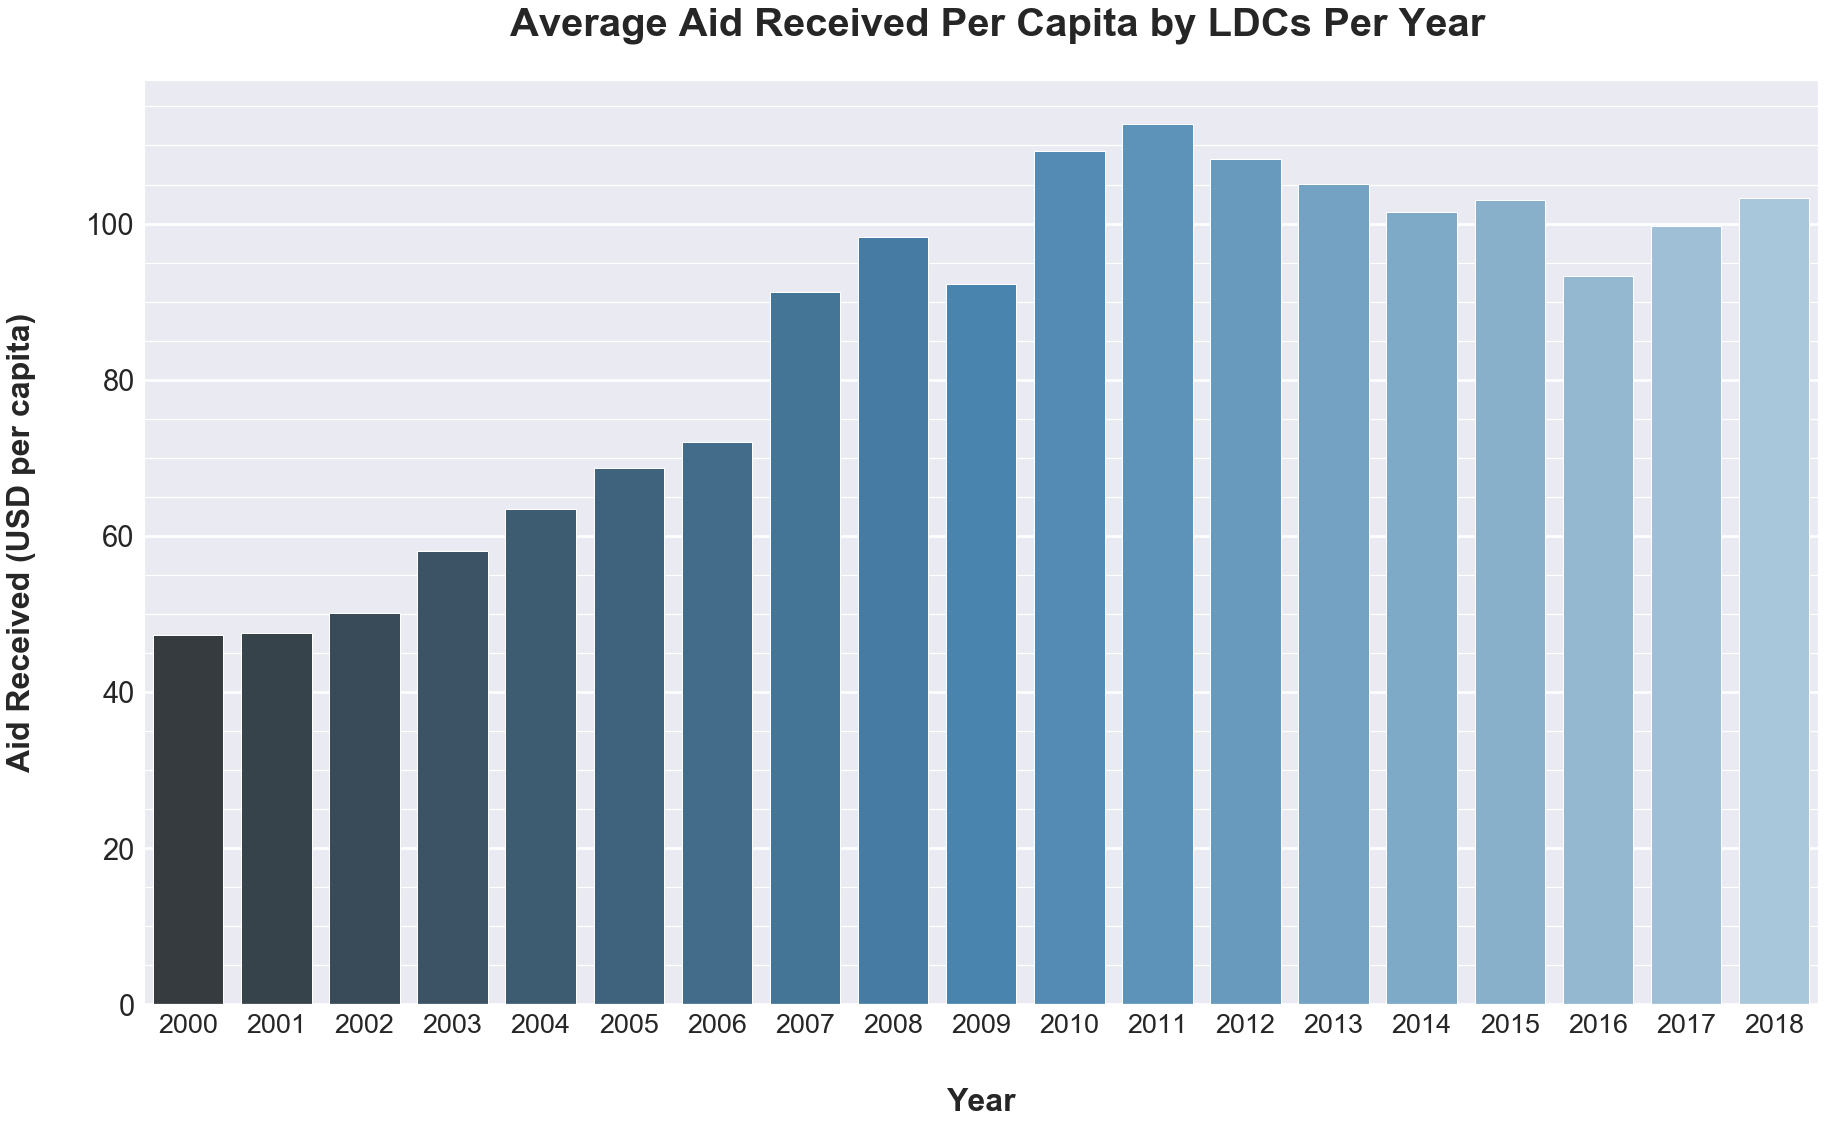

In [854]:
# plot bar graph
plt.figure(figsize=(30,17))
sns.set_style('dark')
sns.barplot(x=avg_aid_ldc.index, y=avg_aid_ldc, palette='Blues_d')
plt.suptitle('Average Aid Received Per Capita by LDCs Per Year', fontsize=40, fontweight='semibold', x=0.52, y=0.94)
plt.xticks(fontsize=27)
plt.xlabel('Year', fontsize=32, labelpad=50, fontweight='semibold')
plt.yticks(fontsize=29)
plt.ylabel('Aid Received (USD per capita)', fontsize=32, labelpad=50, fontweight='semibold')
plt.grid(axis='y', which='major', linewidth=2.7)
plt.grid(axis='y', which='minor', linewidth=1.2)
plt.rc('axes', axisbelow=True)
plt.minorticks_on()
plt.savefig('Average Aid Received Per Year', bbox_inches = "tight", pad_inches=1);

>Here we can visually see that aid has increased among LDCs over time. But let's calculate %change from 2000 to 2018.. 

In [860]:
# Calculate %change. 

avg_aid_ldc.pct_change(periods=18)*100

2000           NaN
2001           NaN
2002           NaN
2003           NaN
2004           NaN
2005           NaN
2006           NaN
2007           NaN
2008           NaN
2009           NaN
2010           NaN
2011           NaN
2012           NaN
2013           NaN
2014           NaN
2015           NaN
2016           NaN
2017           NaN
2018    118.142322
dtype: float64

> As we can see, there has been a 118% increase in aid per capita among LDCs. Not as large of an increase when compared to ODA for all developing countries, but it does demonstrate that aid has been increasing for LDC countries. 

>Now that we have our assumption stated and supported with data, we can now pose questions based on this assumption. 

> - Does the increase in ODA per capita positively correlate with other economic indicators such as, HDI, GINI, and Fertility Rates?
> - Does the amount of ODA/capita received have any impact on the strength of the correlation?
>      - This is where we will seperate the LDC countries into upper quartile aid receivers and lower quartile receivers. 
>      - Before we seperate the data into quartiles, first let's get an overview picture of what our data looks like per country.    

> Before we plot, let's add the mean of each country from 2000-2018 as a column to df_ldc, and then sort the countries in ascending order based on their means. This will make the bar chart look nicer and also make it easier to determine which countries receive the most and least amount of aid. 

In [877]:
# Calculate the mean of each row/country for LDCs. 

ldc_means = []

for country in ldc:
    mean_ldc = df_ldc.loc[country].mean().round(2)
    ldc_means.append(mean_ldc)
    
ldc_means[:10]          # only the first 10 country means.

KeyError: 'Tuvalu'

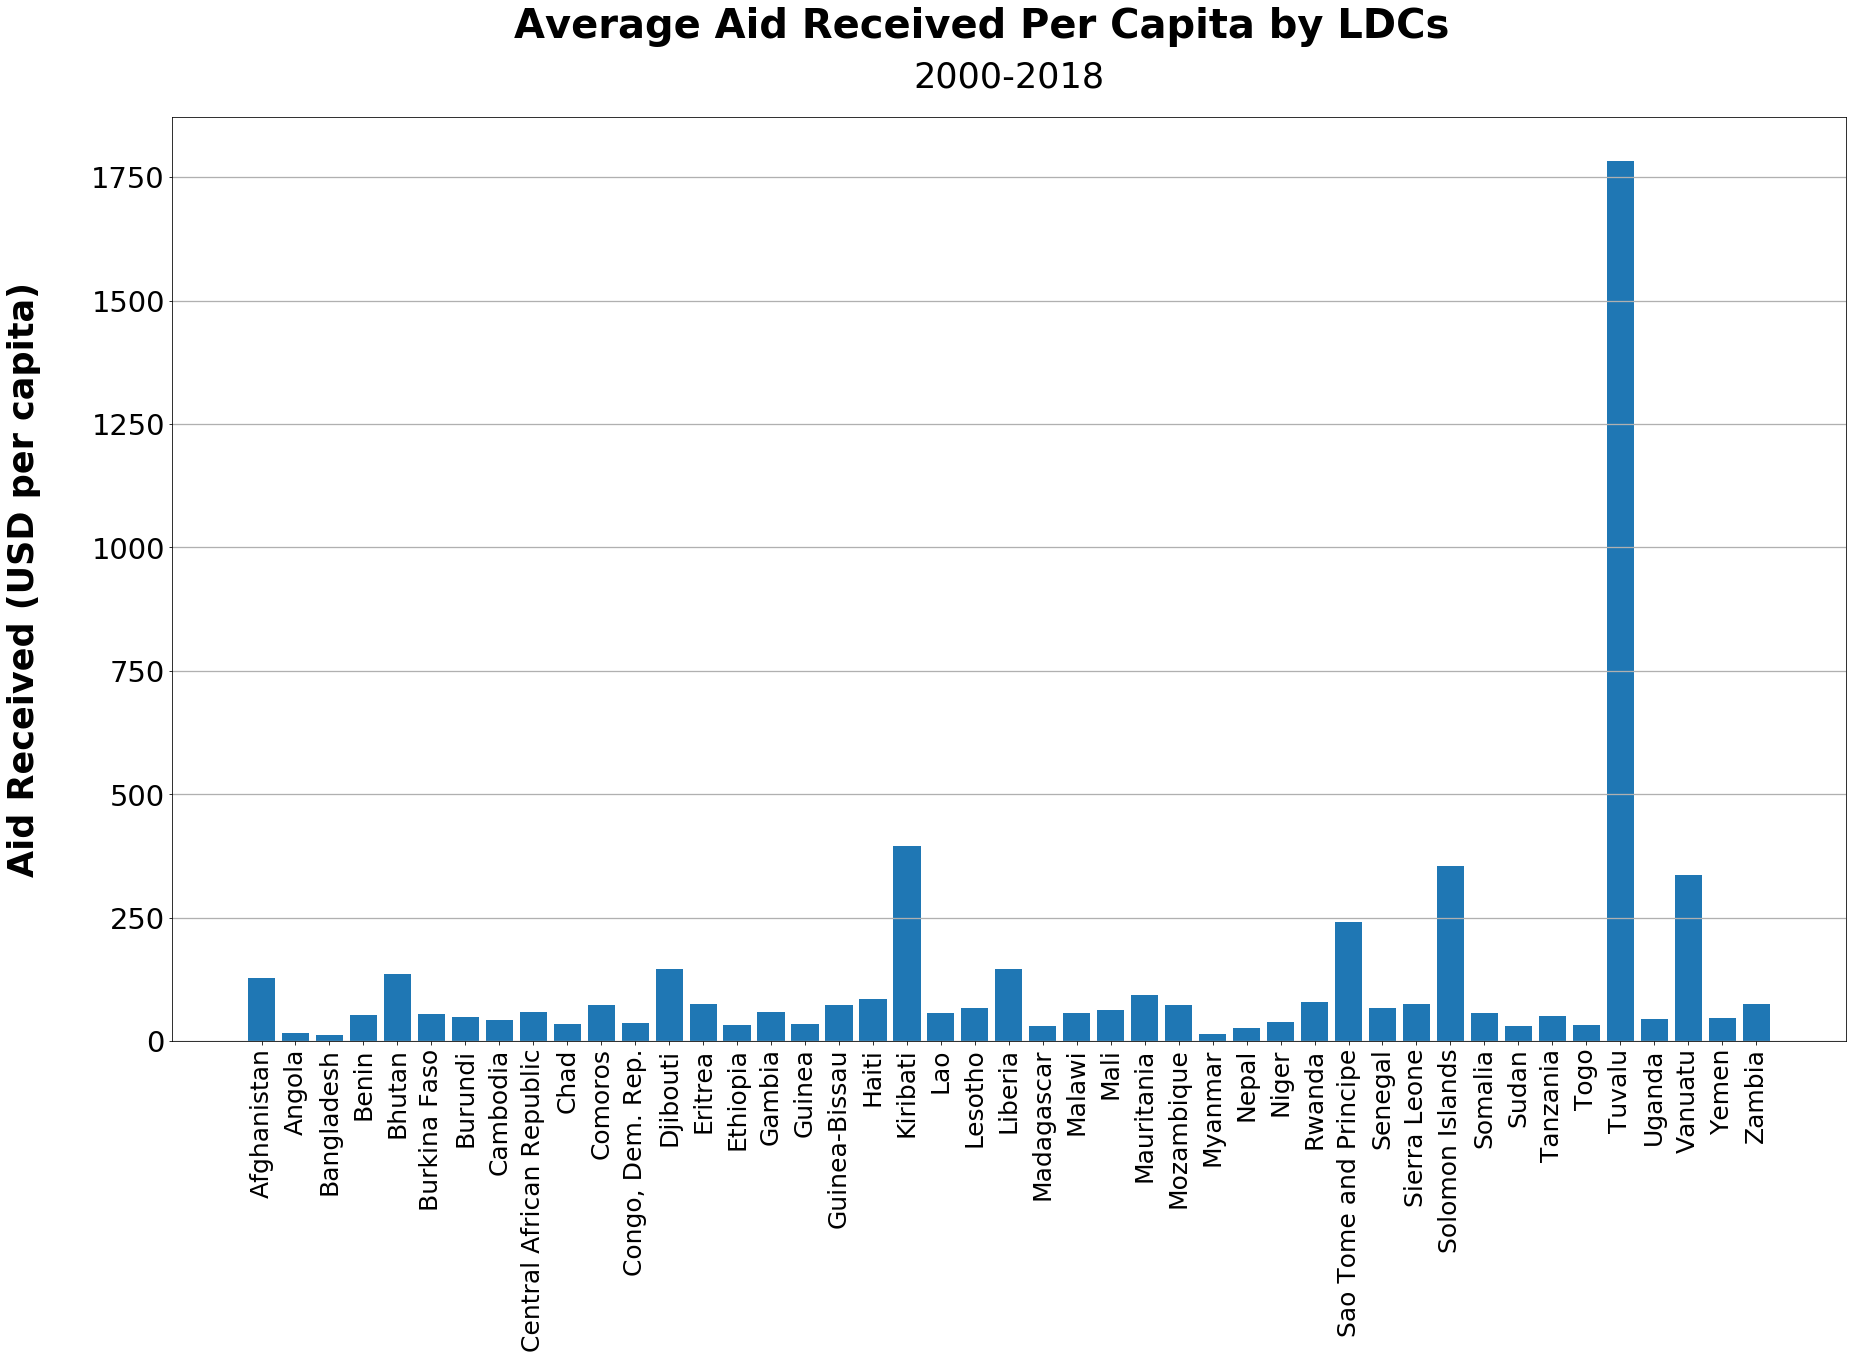

In [259]:
# First let's look at a bar chart of all of LDC countries and the amount of aid they received.

# plt.figure(figsize=(30,17))
# plt.bar(ldc, ldc_means)
# plt.xticks(rotation=90, fontsize=25)
# plt.yticks(fontsize=29)
# plt.suptitle('Average Aid Received Per Capita by LDCs', y=0.97, fontsize=40, fontweight='semibold')
# plt.title('2000-2018', fontsize=35, pad=30)
# plt.ylabel('Aid Received (USD per capita)', fontsize=35, labelpad=50, fontweight='semibold')
# plt.grid(axis='y', linewidth=1.3);
# plt.savefig('Average Aid Received.pdf');

> Before we plot again, let's add the means as a column to df_ldc, and then sort the countries in ascending order based on their means. This will make the bar chart look nicer and also make it easier to determine which countries receive the most and least amount of aid. 

In [400]:
df_ldc['ldc_means'] = df_ldc.mean(axis=1).round(2)
df_ldc.head()

2000   2001   2002    2003   2004   2005    2006    2007   2008  \
country                                                                         
Afghanistan   6.55  19.00  54.10   65.00   91.7  110.0  110.00  184.00  174.0   
Angola       18.40  16.70  23.60   27.20   61.0   21.3    8.12   12.40   17.0   
Bangladesh    7.65   7.06   6.09    9.66   10.4    9.0    7.29    9.17   12.2   
Benin        35.60  39.60  30.40   40.20   50.6   43.7   48.70   56.20   73.2   
Bhutan       79.70  90.50  97.40  116.00  113.0  121.0  141.00  144.00  118.0   

               2009    2010    2011   2012   2013    2014   2015    2016  \
country                                                                    
Afghanistan  215.00  214.00  224.00  214.0  160.0  148.00  124.0  115.00   
Angola        10.60   10.10    7.97    9.7   11.0    8.74   13.6    7.16   
Bangladesh     7.42    8.99    9.63   14.3   17.2   15.70   16.6   16.00   
Benin         75.70   74.90   71.10   52.2   66.0   58.30   41.3   46.10   
Bhutan       149.00  142.00  171.00  230.0  193.0  182.00  134.0   70.00   

               2017    2018  ldc_means  
country                                 
Afghanistan  105.00  102.00     128.18  
Angola         7.49    5.18      15.65  
Bangladesh    23.70   18.80      11.94  
Benin         60.80   49.70      53.38  
Bhutan       159.00  133.00     135.98

In [406]:
# now let's sort.
df_ldc.sort_values(by=['ldc_means'], inplace=True)
df_ldc.head()

2000   2001   2002   2003   2004   2005   2006   2007  2008  \
country                                                                    
Bangladesh   7.65   7.06   6.09   9.66  10.40   9.00   7.29   9.17  12.2   
Myanmar      2.26   2.66   2.50   2.60   2.54   2.96   2.96   3.95  10.7   
Angola      18.40  16.70  23.60  27.20  61.00  21.30   8.12  12.40  17.0   
Nepal       13.00  14.30  13.50  18.10  16.90  15.80  17.40  21.10  23.0   
Madagascar  20.60  23.00  22.30  31.60  70.40  50.00  41.50  46.10  42.4   

             2009   2010   2011   2012  2013   2014  2015   2016   2017  \
country                                                                   
Bangladesh   7.42   8.99   9.63  14.30  17.2  15.70  16.6  16.00  23.70   
Myanmar      7.08   7.01   7.45   9.81  75.9  26.50  22.2  29.00  28.90   
Angola      10.60  10.10   7.97   9.70  11.0   8.74  13.6   7.16   7.49   
Nepal       26.40  28.40  27.70  28.50  32.4  32.80  45.3  39.00  45.90   
Madagascar  21.10  22.60  20.60  16.50  21.7  24.90  28.0  25.00  30.50   

             2018  ldc_means  
country                       
Bangladesh  18.80      11.94  
Myanmar     31.40      14.65  
Angola       5.18      15.65  
Nepal       51.60      26.90  
Madagascar  26.30      30.79

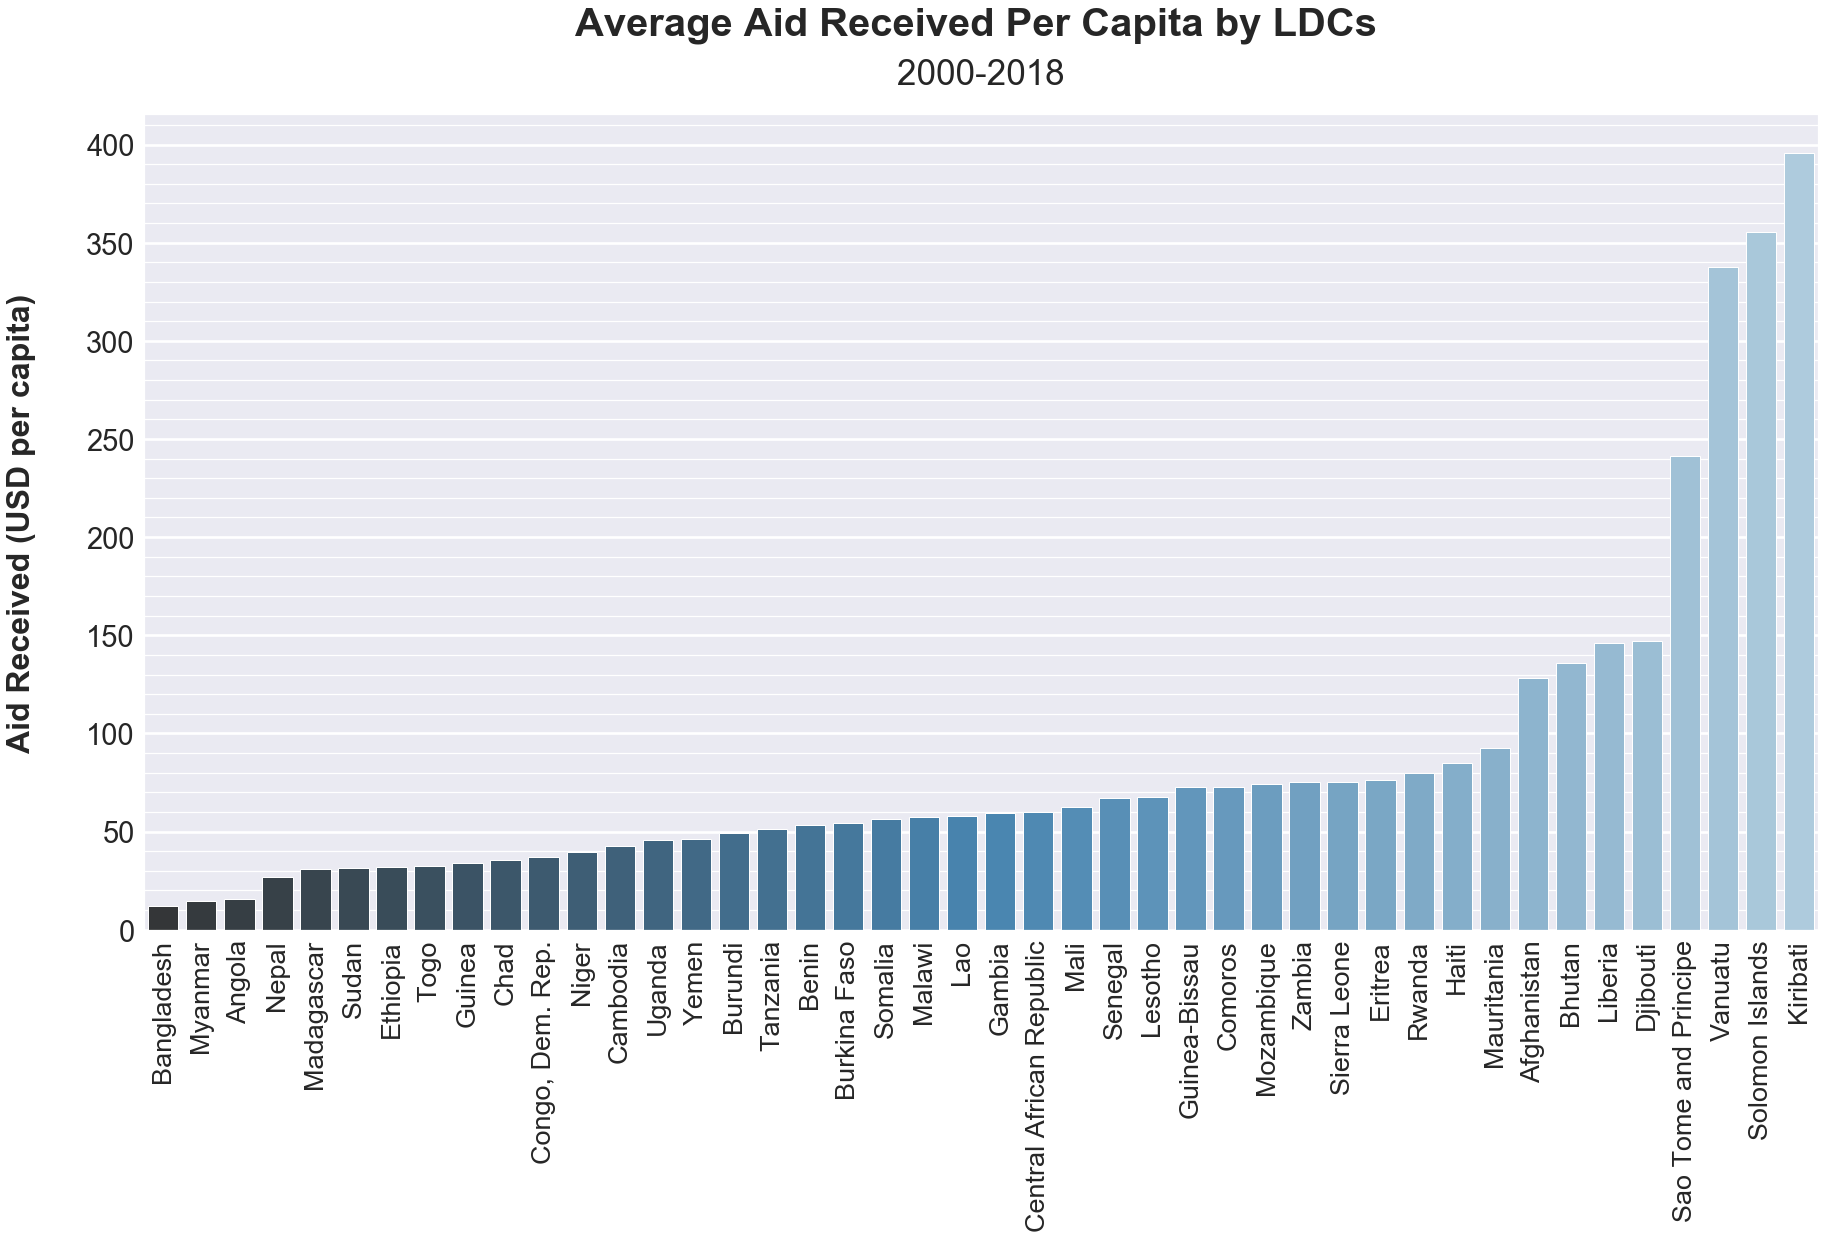

In [878]:
# Now let's plot the bar chart. 

plt.figure(figsize=(30,15))
sns.set_style('dark')
sns.barplot(x='country', y='ldc_means', data=df_ldc.reset_index(), palette='Blues_d')
plt.suptitle('Average Aid Received Per Capita by LDCs', fontsize=40, fontweight='semibold', x=0.51)
plt.title('2000-2018', fontsize=35, pad=30)
plt.xticks(rotation=90, fontsize=27)
plt.xlabel('')
plt.yticks(fontsize=29)
plt.ylabel('Aid Received (USD per capita)', fontsize=32, labelpad=50, fontweight='semibold')
plt.grid(axis='y', which='major', linewidth=2.7)
plt.grid(axis='y', which='minor', linewidth=1.2)
plt.rc('axes', axisbelow=True)
plt.minorticks_on()
# plt.tick_params(axis='y', which='minor', direction='out', length=5, width=2)
# plt.tick_params(which='minor', bottom=False)
# plt.tick_params(axis='x', length=10, width=2)
# plt.tick_params(axis='y', which='major', length=7, width=2);
plt.savefig('Average Aid Received Per Country', bbox_inches = "tight", pad_inches=1);

> Now that we have a visual of our LDC coutries, let's start comparing them. 

>My idea is to find which countries are in the upper and lower quartile of average amount of aid received. From there you can then use the yearly data of each country to plot against the yearly data for other variables, such as HDI, GINI, % of internet users, and fertility rates. 

>Since there is a pretty sizeable distribution of the amount of money countries receive in the LDC group, my idea is to isolate 2 groups, the highest receivers and the lowest, i.e. upper and lower quartile. This will also allow me to anlayze how much of an impact the amount of money per capita a country receives. If the upper quartile countries, see much higher correlations between aid and the other indicators, then this would indicate that the methods by which money is being distributed is flawed. Because, ideally we would want to see the same amount of development between upper and lower countries regardless of how much money they are receiving, because this would indicate efficient distribution and use. 

In [419]:
# let's first find the values that will define our quartiles. 
df_ldc.ldc_means.describe()

count     44.000000
mean      85.531364
std       86.771819
min       11.940000
25%       38.980000
50%       58.545000
75%       77.082500
max      395.630000
Name: ldc_means, dtype: float64

In [420]:
# 11 countries are in the upper quartile, or 75th percentile.
df_upper = df_ldc.query('ldc_means >= 77.0825').loc[:, '2000':'2018']
df_upper

2000   2001   2002   2003   2004   2005   2006  \
country                                                                   
Rwanda                  40.50   37.0   42.7   39.3   56.6   64.8   66.9   
Haiti                   21.50   19.8   17.4   21.0   31.0   39.9   56.9   
Mauritania              85.00  105.0  131.0   91.3   66.3   62.4   69.5   
Afghanistan              6.55   19.0   54.1   65.0   91.7  110.0  110.0   
Bhutan                  79.70   90.5   97.4  116.0  113.0  121.0  141.0   
Liberia                 23.70   13.0   18.2   34.7   68.1   69.0   78.4   
Djibouti               101.00   81.0   99.2  104.0   83.4   94.7  145.0   
Sao Tome and Principe  246.00  264.0  177.0  252.0  219.0  208.0  143.0   
Vanuatu                192.00  154.0  141.0  166.0  189.0  193.0  231.0   
Solomon Islands        166.00  140.0   60.1  139.0  265.0  419.0  415.0   
Kiribati               201.00  129.0  230.0  183.0  161.0  289.0  271.0   

                        2007   2008   2009   2010   2011   2012   2013   2014  \
country                                                                         
Rwanda                  84.1   98.2   95.5  103.0  123.0   83.3  100.0   93.4   
Haiti                   65.6   85.5  101.0  290.0  149.0  124.0  111.0  103.0   
Mauritania             109.0  138.0  111.0  107.0  106.0  111.0   77.2   66.3   
Afghanistan            184.0  174.0  215.0  214.0  224.0  214.0  160.0  148.0   
Bhutan                 144.0  118.0  149.0  142.0  171.0  230.0  193.0  182.0   
Liberia                324.0  347.0  136.0  364.0  190.0  137.0  126.0  172.0   
Djibouti               140.0  172.0  200.0  157.0  166.0  171.0  169.0  185.0   
Sao Tome and Principe  307.0  276.0  173.0  278.0  398.0  269.0  280.0  211.0   
Vanuatu                263.0  415.0  439.0  463.0  383.0  409.0  356.0  381.0   
Solomon Islands        482.0  445.0  399.0  631.0  605.0  549.0  507.0  342.0   
Kiribati               285.0  273.0  249.0  231.0  616.0  617.0  602.0  737.0   

                        2015   2016   2017   2018  
country                                            
Rwanda                  95.7   98.6  103.0   91.0  
Haiti                   97.8   98.9   89.3   89.2  
Mauritania              81.4   73.8   67.9  102.0  
Afghanistan            124.0  115.0  105.0  102.0  
Bhutan                 134.0   70.0  159.0  133.0  
Liberia                245.0  179.0  134.0  118.0  
Djibouti               190.0  199.0  151.0  185.0  
Sao Tome and Principe  245.0  231.0  194.0  210.0  
Vanuatu                688.0  464.0  463.0  423.0  
Solomon Islands        315.0  283.0  294.0  296.0  
Kiribati               586.0  541.0  676.0  640.0

In [421]:
# 11 countries are in the lower quartile, or 25th percentile.
df_lower = df_ldc.query('ldc_means <= 38.98').loc[:, '2000':'2018']
df_lower

2000   2001   2002    2003   2004   2005   2006   2007  \
country                                                                     
Bangladesh         7.65   7.06   6.09    9.66  10.40   9.00   7.29   9.17   
Myanmar            2.26   2.66   2.50    2.60   2.54   2.96   2.96   3.95   
Angola            18.40  16.70  23.60   27.20  61.00  21.30   8.12  12.40   
Nepal             13.00  14.30  13.50   18.10  16.90  15.80  17.40  21.10   
Madagascar        20.60  23.00  22.30   31.60  70.40  50.00  41.50  46.10   
Sudan              6.48   5.37   8.29   16.40  25.50  45.60  49.70  50.00   
Ethiopia          10.40  16.20  18.90   22.50  24.70  25.30  25.90  32.30   
Togo              14.10   9.10   9.84    9.40  11.90  14.70  13.90  20.70   
Guinea            18.60  34.40  29.60   28.60  30.80  21.20  18.60  27.10   
Chad              15.70  21.70  25.40   26.90  34.10  38.30  27.80  34.00   
Congo, Dem. Rep.   3.79   5.09  23.60  105.00  36.20  34.30  38.80  23.10   

                  2008   2009   2010   2011   2012  2013   2014  2015   2016  \
country                                                                        
Bangladesh        12.2   7.42   8.99   9.63  14.30  17.2  15.70  16.6  16.00   
Myanmar           10.7   7.08   7.01   7.45   9.81  75.9  26.50  22.2  29.00   
Angola            17.0  10.60  10.10   7.97   9.70  11.0   8.74  13.6   7.16   
Nepal             23.0  26.40  28.40  27.70  28.50  32.4  32.80  45.3  39.00   
Madagascar        42.4  21.10  22.60  20.60  16.50  21.7  24.90  28.0  25.00   
Sudan             58.8  52.40  43.90  47.20  36.30  39.1  22.20  22.4  19.70   
Ethiopia          40.0  44.90  39.40  38.80  35.00  40.7  36.50  32.1  39.40   
Togo              54.3  79.10  62.80  82.20  36.20  32.5  29.60  27.2  22.40   
Guinea            36.1  21.80  21.70  19.40  59.50  42.9  50.50  47.1  48.30   
Chad              39.5  48.30  41.00  37.00  37.20  34.7  28.70  43.0  42.90   
Congo, Dem. Rep.  29.2  37.80  54.00  82.80  41.20  36.2  32.50  34.1  26.70   

                   2017   2018  
country                         
Bangladesh        23.70  18.80  
Myanmar           28.90  31.40  
Angola             7.49   5.18  
Nepal             45.90  51.60  
Madagascar        30.50  26.30  
Sudan             19.90  31.62  
Ethiopia          38.80  45.10  
Togo              44.70  37.60  
Guinea            39.10  47.60  
Chad              43.10  56.60  
Congo, Dem. Rep.  28.20  29.90

>Holy fuck that was lucky, the number of countries in the upper and lower quartiles are both 11. Nice!

> Now that we have our two groups, we can calculate the average amount of aid per capita each group received collectively per year. These will be the x-values we can use in our scatter plots to find our correlations. 

In [596]:
# Average aid received per year by countries in the upper quartile. 
avg_aid_upper = df_upper.mean()
avg_aid_upper

2000    105.722727
2001     95.663636
2002     97.100000
2003    110.118182
2004    122.190909
2005    151.890909
2006    157.063636
2007    217.063636
2008    231.063636
2009    206.136364
2010    270.909091
2011    284.636364
2012    264.936364
2013    243.745455
2014    238.245455
2015    254.718182
2016    213.936364
2017    221.472727
2018    217.200000
dtype: float64

In [597]:
# Average aid received per year by countries in the lower quartile. 
avg_aid_lower = df_lower.mean()
avg_aid_lower

2000    11.907273
2001    14.143636
2002    16.692727
2003    27.087273
2004    29.494545
2005    25.314545
2006    22.906364
2007    25.447273
2008    33.018182
2009    32.445455
2010    30.900000
2011    34.613636
2012    29.473636
2013    34.936364
2014    28.058182
2015    30.145455
2016    28.687273
2017    31.844545
2018    34.700000
dtype: float64

> Now that we have found the average aid received by each group of LDC countries, those in the upper and lower quartiles, we can now do the same thing with each variable, and then plot these mean values against each other. 

In [424]:
# lists of countries in each quartile to use when forming dataframes of other variables. 

countries_upper = df_upper.index.tolist()
countries_lower = df_lower.index.tolist()
countries_upper, countries_lower

(['Rwanda',
  'Haiti',
  'Mauritania',
  'Afghanistan',
  'Bhutan',
  'Liberia',
  'Djibouti',
  'Sao Tome and Principe',
  'Vanuatu',
  'Solomon Islands',
  'Kiribati'],
 ['Bangladesh',
  'Myanmar',
  'Angola',
  'Nepal',
  'Madagascar',
  'Sudan',
  'Ethiopia',
  'Togo',
  'Guinea',
  'Chad',
  'Congo, Dem. Rep.'])

In [543]:
df_hdi = pd.read_csv('hdi.csv')
df_hdi.head()

country   1990   1991   1992   1993   1994   1995   1996   1997   1998  \
0  Afghanistan  0.295  0.300  0.309  0.305  0.300  0.324  0.328  0.332  0.335   
1      Albania  0.635  0.618  0.603  0.608  0.616  0.628  0.637  0.636  0.646   
2      Algeria  0.577  0.581  0.587  0.591  0.595  0.600  0.609  0.617  0.627   
3      Andorra    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4       Angola    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

   ...   2006   2007   2008   2009   2010   2011   2012   2013   2014   2015  
0  ...  0.415  0.433  0.434  0.448  0.454  0.463  0.470  0.476  0.479  0.479  
1  ...  0.703  0.713  0.721  0.725  0.738  0.752  0.759  0.761  0.762  0.764  
2  ...  0.690  0.697  0.705  0.714  0.724  0.732  0.737  0.741  0.743  0.745  
3  ...    NaN    NaN    NaN    NaN  0.819  0.819  0.843  0.850  0.857  0.858  
4  ...  0.454  0.468  0.480  0.488  0.495  0.508  0.523  0.527  0.531  0.533  

[5 rows x 27 columns]

>Ok so this csv file doesn't have data for 2016-2018, I got the missing data from hdr.undp.org/en/data, which is the official body that produces HDI. Below I will import that csv and then clean it a bit to get the info I need. 

In [885]:
df_hdi_16_18 = pd.read_csv('hdi_2016_2018.csv', header=1)
df_hdi_16_18.head()

HDI Rank (2018)      Country   1990  Unnamed: 3   1991  Unnamed: 5   1992  \
0             170  Afghanistan  0.298         NaN  0.304         NaN  0.312   
1              69      Albania  0.644         NaN  0.625         NaN  0.608   
2              82      Algeria  0.578         NaN  0.582         NaN  0.589   
3              36      Andorra     ..         NaN     ..         NaN     ..   
4             149       Angola     ..         NaN     ..         NaN     ..   

   Unnamed: 7   1993  Unnamed: 9  ...   2014  Unnamed: 51   2015  Unnamed: 53  \
0         NaN  0.308         NaN  ...  0.488          NaN  0.490          NaN   
1         NaN  0.611         NaN  ...  0.787          NaN  0.788          NaN   
2         NaN  0.593         NaN  ...  0.749          NaN  0.751          NaN   
3         NaN     ..         NaN  ...  0.853          NaN  0.850          NaN   
4         NaN     ..         NaN  ...  0.557          NaN  0.565          NaN   

    2016  Unnamed: 55   2017  Unnamed: 57   2018  Unnamed: 59  
0  0.491          NaN  0.493          NaN  0.496          NaN  
1  0.788          NaN  0.789          NaN  0.791          NaN  
2  0.755          NaN  0.758          NaN  0.759          NaN  
3  0.854          NaN  0.852          NaN  0.857          NaN  
4  0.570          NaN  0.576          NaN  0.574          NaN  

[5 rows x 60 columns]

In [887]:
df_hdi_16_18['Country']

0                                            Afghanistan
1                                                Albania
2                                                Algeria
3                                                Andorra
4                                                 Angola
                             ...                        
202                            Least Developed Countries
203                       Small Island Developing States
204    Organization for Economic Co-operation and Dev...
205                                                World
206                                                  NaN
Name: Country, Length: 207, dtype: object

>Ok so I can clean this df up a bit. I only want the columns: country and 2016-2018. I also only want the rows that correspond to the countries in my upper and lower groups. 

In [889]:
df_hdi_16_18 = df_hdi_16_18[['Country', '2016', '2017', '2018']].set_index('Country')
df_hdi_16_18

2016   2017   2018
Country                                                                
Afghanistan                                         0.491  0.493  0.496
Albania                                             0.788  0.789  0.791
Algeria                                             0.755  0.758  0.759
Andorra                                             0.854  0.852  0.857
Angola                                              0.570  0.576  0.574
...                                                   ...    ...    ...
Least Developed Countries                           0.520  0.525  0.528
Small Island Developing States                      0.719  0.722  0.723
Organization for Economic Co-operation and Deve...  0.892  0.894  0.895
World                                               0.727  0.729  0.731
NaN                                                   NaN    NaN    NaN

[207 rows x 3 columns]

In [890]:
df_hdi_16_18_upper = df_hdi_16_18.loc[countries_upper]
df_hdi_16_18_upper

2016   2017   2018
Country                                   
Rwanda                 0.525  0.529  0.536
Haiti                  0.497  0.501  0.503
Mauritania             0.519  0.524  0.527
Afghanistan            0.491  0.493  0.496
Bhutan                 0.610  0.615  0.617
Liberia                0.463  0.466  0.465
Djibouti               0.489  0.492  0.495
Sao Tome and Principe  0.593  0.603  0.609
Vanuatu                0.592  0.595  0.597
Solomon Islands        0.553  0.555  0.557
Kiribati               0.622  0.623  0.623

In [499]:
# the name for Congo is different in 16-18 data, so lets make a new temp. list. 
countries_lower_temp = ['Bangladesh', 'Myanmar', 'Angola', 'Nepal', 'Madagascar', 'Sudan', 'Ethiopia',
                        'Togo', 'Guinea', 'Chad', 'Congo (Democratic Republic of the)']

df_hdi_16_18_lower = df_hdi_16_18.loc[countries_lower_temp]
df_hdi_16_18_lower

2016   2017   2018
Country                                                
Bangladesh                          0.599  0.609  0.614
Myanmar                             0.571  0.577  0.584
Angola                              0.570  0.576  0.574
Nepal                               0.572  0.574  0.579
Madagascar                          0.515  0.518  0.521
Sudan                               0.505  0.507  0.508
Ethiopia                            0.460  0.467  0.470
Togo                                0.506  0.510  0.513
Guinea                              0.456  0.463  0.466
Chad                                0.398  0.401  0.401
Congo (Democratic Republic of the)  0.453  0.456  0.459

> OK now we have our data for 2016-2018, now we can clean the main df_hdi, and seperate it into upper and lower dataframes and then merge these two to those dataframes. 

In [566]:
# hdi of upper quartile countries. 
df_hdi_upper = df_hdi.set_index('country').loc[countries_upper, '2000':'2015']
df_hdi_upper

2000   2001   2002   2003   2004   2005   2006   2007  \
country                                                                         
Rwanda                 0.332  0.343  0.359  0.371  0.388  0.404  0.424  0.438   
Haiti                  0.443  0.444  0.447  0.450  0.452  0.455  0.458  0.462   
Mauritania             0.444  0.446  0.447  0.451  0.461  0.466  0.475  0.475   
Afghanistan            0.340  0.341  0.373  0.381  0.396  0.405  0.415  0.433   
Bhutan                   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Liberia                0.386  0.376  0.373  0.335  0.372  0.377  0.383  0.394   
Djibouti               0.363  0.372  0.378  0.388  0.396  0.405  0.416  0.427   
Sao Tome and Principe  0.497  0.501  0.504  0.509  0.514  0.521  0.527  0.531   
Vanuatu                  NaN    NaN    NaN    NaN    NaN  0.572  0.579  0.582   
Solomon Islands        0.442  0.446  0.453  0.459  0.465  0.470  0.482  0.489   
Kiribati                 NaN    NaN    NaN    NaN    NaN  0.576  0.574  0.572   

                        2008   2009   2010   2011   2012   2013   2014   2015  
country                                                                        
Rwanda                 0.447  0.454  0.464  0.475  0.485  0.488  0.493  0.498  
Haiti                  0.466  0.470  0.470  0.477  0.483  0.487  0.490  0.493  
Mauritania             0.476  0.484  0.487  0.491  0.501  0.509  0.513  0.513  
Afghanistan            0.434  0.448  0.454  0.463  0.470  0.476  0.479  0.479  
Bhutan                   NaN    NaN  0.572  0.581  0.589  0.596  0.604  0.607  
Liberia                0.400  0.403  0.406  0.416  0.419  0.426  0.427  0.427  
Djibouti               0.436  0.441  0.451  0.460  0.464  0.467  0.470  0.473  
Sao Tome and Principe  0.533  0.542  0.546  0.553  0.559  0.562  0.565  0.574  
Vanuatu                0.589  0.590  0.591  0.592  0.591  0.596  0.598  0.597  
Solomon Islands        0.494  0.492  0.497  0.505  0.509  0.512  0.514  0.515  
Kiribati               0.576  0.584  0.585  0.581  0.589  0.597  0.586  0.588

> There are some missing values here that I was able to find couple of these values from a UNDP report for the years 2000 and 2005. Let's insert those..

In [567]:
df_hdi_upper.loc['Bhutan', '2000'] = 0.494
df_hdi_upper.loc['Bhutan', '2005'] = 0.512
df_hdi_upper.loc['Kiribati', '2000'] = 0.552
df_hdi_upper

2000   2001   2002   2003   2004   2005   2006   2007  \
country                                                                         
Rwanda                 0.332  0.343  0.359  0.371  0.388  0.404  0.424  0.438   
Haiti                  0.443  0.444  0.447  0.450  0.452  0.455  0.458  0.462   
Mauritania             0.444  0.446  0.447  0.451  0.461  0.466  0.475  0.475   
Afghanistan            0.340  0.341  0.373  0.381  0.396  0.405  0.415  0.433   
Bhutan                 0.494    NaN    NaN    NaN    NaN  0.512    NaN    NaN   
Liberia                0.386  0.376  0.373  0.335  0.372  0.377  0.383  0.394   
Djibouti               0.363  0.372  0.378  0.388  0.396  0.405  0.416  0.427   
Sao Tome and Principe  0.497  0.501  0.504  0.509  0.514  0.521  0.527  0.531   
Vanuatu                  NaN    NaN    NaN    NaN    NaN  0.572  0.579  0.582   
Solomon Islands        0.442  0.446  0.453  0.459  0.465  0.470  0.482  0.489   
Kiribati               0.552    NaN    NaN    NaN    NaN  0.576  0.574  0.572   

                        2008   2009   2010   2011   2012   2013   2014   2015  
country                                                                        
Rwanda                 0.447  0.454  0.464  0.475  0.485  0.488  0.493  0.498  
Haiti                  0.466  0.470  0.470  0.477  0.483  0.487  0.490  0.493  
Mauritania             0.476  0.484  0.487  0.491  0.501  0.509  0.513  0.513  
Afghanistan            0.434  0.448  0.454  0.463  0.470  0.476  0.479  0.479  
Bhutan                   NaN    NaN  0.572  0.581  0.589  0.596  0.604  0.607  
Liberia                0.400  0.403  0.406  0.416  0.419  0.426  0.427  0.427  
Djibouti               0.436  0.441  0.451  0.460  0.464  0.467  0.470  0.473  
Sao Tome and Principe  0.533  0.542  0.546  0.553  0.559  0.562  0.565  0.574  
Vanuatu                0.589  0.590  0.591  0.592  0.591  0.596  0.598  0.597  
Solomon Islands        0.494  0.492  0.497  0.505  0.509  0.512  0.514  0.515  
Kiribati               0.576  0.584  0.585  0.581  0.589  0.597  0.586  0.588

> I was only able to find 3 values, 2 for Bhutan and 1 for Kiribati, which I can use to interpolate. I will also interpolate Vanuatu to keep things consistent, since using the mean will show an artificial drop in hdi from 2000-2004. 

In [873]:
# Bhutan interpolation, USE FOR LOOP HERE
df_hdi_upper.loc['Bhutan'] = df_hdi_upper.loc['Bhutan'].interpolate().round(3)
df_hdi_upper

2000   2001   2002   2003   2004   2005   2006   2007  \
Rwanda                 0.332  0.343  0.359  0.371  0.388  0.404  0.424  0.438   
Haiti                  0.443  0.444  0.447  0.450  0.452  0.455  0.458  0.462   
Mauritania             0.444  0.446  0.447  0.451  0.461  0.466  0.475  0.475   
Afghanistan            0.340  0.341  0.373  0.381  0.396  0.405  0.415  0.433   
Bhutan                 0.494  0.498  0.501  0.505  0.508  0.512  0.524  0.536   
Liberia                0.386  0.376  0.373  0.335  0.372  0.377  0.383  0.394   
Djibouti               0.363  0.372  0.378  0.388  0.396  0.405  0.416  0.427   
Sao Tome and Principe  0.497  0.501  0.504  0.509  0.514  0.521  0.527  0.531   
Vanuatu                0.572  0.572  0.572  0.572  0.572  0.572  0.579  0.582   
Solomon Islands        0.442  0.446  0.453  0.459  0.465  0.470  0.482  0.489   
Kiribati               0.552  0.557  0.562  0.566  0.571  0.576  0.574  0.572   

                        2008   2009   2010   2011   2012   2013   2014   2015  \
Rwanda                 0.447  0.454  0.464  0.475  0.485  0.488  0.493  0.498   
Haiti                  0.466  0.470  0.470  0.477  0.483  0.487  0.490  0.493   
Mauritania             0.476  0.484  0.487  0.491  0.501  0.509  0.513  0.513   
Afghanistan            0.434  0.448  0.454  0.463  0.470  0.476  0.479  0.479   
Bhutan                 0.548  0.560  0.572  0.581  0.589  0.596  0.604  0.607   
Liberia                0.400  0.403  0.406  0.416  0.419  0.426  0.427  0.427   
Djibouti               0.436  0.441  0.451  0.460  0.464  0.467  0.470  0.473   
Sao Tome and Principe  0.533  0.542  0.546  0.553  0.559  0.562  0.565  0.574   
Vanuatu                0.589  0.590  0.591  0.592  0.591  0.596  0.598  0.597   
Solomon Islands        0.494  0.492  0.497  0.505  0.509  0.512  0.514  0.515   
Kiribati               0.576  0.584  0.585  0.581  0.589  0.597  0.586  0.588   

                        2016   2017   2018  
Rwanda                 0.525  0.529  0.536  
Haiti                  0.497  0.501  0.503  
Mauritania             0.519  0.524  0.527  
Afghanistan            0.491  0.493  0.496  
Bhutan                 0.610  0.615  0.617  
Liberia                0.463  0.466  0.465  
Djibouti               0.489  0.492  0.495  
Sao Tome and Principe  0.593  0.603  0.609  
Vanuatu                0.592  0.595  0.597  
Solomon Islands        0.553  0.555  0.557  
Kiribati               0.622  0.623  0.623

In [569]:

# obviously this just repeats the value from 2005, but I figured that this would be less detrimental to the analysis than 
# imputing the mean, because when doing this it shows an artificial drop in hdi from 2000-2004 since the mean is 0.589.

2000   2001   2002   2003   2004   2005   2006   2007  \
country                                                                         
Rwanda                 0.332  0.343  0.359  0.371  0.388  0.404  0.424  0.438   
Haiti                  0.443  0.444  0.447  0.450  0.452  0.455  0.458  0.462   
Mauritania             0.444  0.446  0.447  0.451  0.461  0.466  0.475  0.475   
Afghanistan            0.340  0.341  0.373  0.381  0.396  0.405  0.415  0.433   
Bhutan                 0.494  0.498  0.501  0.505  0.508  0.512  0.524  0.536   
Liberia                0.386  0.376  0.373  0.335  0.372  0.377  0.383  0.394   
Djibouti               0.363  0.372  0.378  0.388  0.396  0.405  0.416  0.427   
Sao Tome and Principe  0.497  0.501  0.504  0.509  0.514  0.521  0.527  0.531   
Vanuatu                0.572  0.572  0.572  0.572  0.572  0.572  0.579  0.582   
Solomon Islands        0.442  0.446  0.453  0.459  0.465  0.470  0.482  0.489   
Kiribati               0.552    NaN    NaN    NaN    NaN  0.576  0.574  0.572   

                        2008   2009   2010   2011   2012   2013   2014   2015  
country                                                                        
Rwanda                 0.447  0.454  0.464  0.475  0.485  0.488  0.493  0.498  
Haiti                  0.466  0.470  0.470  0.477  0.483  0.487  0.490  0.493  
Mauritania             0.476  0.484  0.487  0.491  0.501  0.509  0.513  0.513  
Afghanistan            0.434  0.448  0.454  0.463  0.470  0.476  0.479  0.479  
Bhutan                 0.548  0.560  0.572  0.581  0.589  0.596  0.604  0.607  
Liberia                0.400  0.403  0.406  0.416  0.419  0.426  0.427  0.427  
Djibouti               0.436  0.441  0.451  0.460  0.464  0.467  0.470  0.473  
Sao Tome and Principe  0.533  0.542  0.546  0.553  0.559  0.562  0.565  0.574  
Vanuatu                0.589  0.590  0.591  0.592  0.591  0.596  0.598  0.597  
Solomon Islands        0.494  0.492  0.497  0.505  0.509  0.512  0.514  0.515  
Kiribati               0.576  0.584  0.585  0.581  0.589  0.597  0.586  0.588

In [570]:
# Kiribati interpolation.
df_hdi_upper.loc['Kiribati'] = df_hdi_upper.loc['Kiribati'].interpolate().round(3)
df_hdi_upper

2000   2001   2002   2003   2004   2005   2006   2007  \
country                                                                         
Rwanda                 0.332  0.343  0.359  0.371  0.388  0.404  0.424  0.438   
Haiti                  0.443  0.444  0.447  0.450  0.452  0.455  0.458  0.462   
Mauritania             0.444  0.446  0.447  0.451  0.461  0.466  0.475  0.475   
Afghanistan            0.340  0.341  0.373  0.381  0.396  0.405  0.415  0.433   
Bhutan                 0.494  0.498  0.501  0.505  0.508  0.512  0.524  0.536   
Liberia                0.386  0.376  0.373  0.335  0.372  0.377  0.383  0.394   
Djibouti               0.363  0.372  0.378  0.388  0.396  0.405  0.416  0.427   
Sao Tome and Principe  0.497  0.501  0.504  0.509  0.514  0.521  0.527  0.531   
Vanuatu                0.572  0.572  0.572  0.572  0.572  0.572  0.579  0.582   
Solomon Islands        0.442  0.446  0.453  0.459  0.465  0.470  0.482  0.489   
Kiribati               0.552  0.557  0.562  0.566  0.571  0.576  0.574  0.572   

                        2008   2009   2010   2011   2012   2013   2014   2015  
country                                                                        
Rwanda                 0.447  0.454  0.464  0.475  0.485  0.488  0.493  0.498  
Haiti                  0.466  0.470  0.470  0.477  0.483  0.487  0.490  0.493  
Mauritania             0.476  0.484  0.487  0.491  0.501  0.509  0.513  0.513  
Afghanistan            0.434  0.448  0.454  0.463  0.470  0.476  0.479  0.479  
Bhutan                 0.548  0.560  0.572  0.581  0.589  0.596  0.604  0.607  
Liberia                0.400  0.403  0.406  0.416  0.419  0.426  0.427  0.427  
Djibouti               0.436  0.441  0.451  0.460  0.464  0.467  0.470  0.473  
Sao Tome and Principe  0.533  0.542  0.546  0.553  0.559  0.562  0.565  0.574  
Vanuatu                0.589  0.590  0.591  0.592  0.591  0.596  0.598  0.597  
Solomon Islands        0.494  0.492  0.497  0.505  0.509  0.512  0.514  0.515  
Kiribati               0.576  0.584  0.585  0.581  0.589  0.597  0.586  0.588

> Ther is our main hdi df cleaned for the upper quartile of countries. Now we need to do the same thing for the lower quartile countries. 

In [580]:
# hdi of lower quartile countries. 
df_hdi_lower = df_hdi.set_index('country').loc[countries_lower, '2000':'2015']
df_hdi_lower

2000   2001   2002   2003   2004   2005   2006   2007  \
country                                                                    
Bangladesh        0.468  0.476  0.484  0.491  0.499  0.506  0.513  0.520   
Myanmar           0.427  0.435  0.445  0.455  0.465  0.474  0.484  0.493   
Angola            0.391  0.401  0.406  0.415  0.426  0.439  0.454  0.468   
Nepal             0.446  0.447  0.457  0.463  0.469  0.476  0.486  0.492   
Madagascar        0.456  0.462  0.457  0.466  0.473  0.478  0.483  0.491   
Sudan             0.399  0.403  0.409  0.415  0.423  0.430  0.440  0.444   
Ethiopia          0.283  0.298  0.306  0.310  0.325  0.346  0.362  0.378   
Togo              0.426  0.428  0.428  0.432  0.435  0.436  0.443  0.441   
Guinea            0.322  0.329  0.338  0.325  0.346  0.356  0.364  0.371   
Chad              0.300  0.303  0.284  0.301  0.306  0.303  0.306  0.338   
Congo, Dem. Rep.  0.331  0.332  0.339  0.347  0.355  0.364  0.370  0.377   

                   2008   2009   2010   2011   2012   2013   2014   2015  
country                                                                   
Bangladesh        0.523  0.535  0.545  0.557  0.565  0.570  0.575  0.579  
Myanmar           0.504  0.515  0.526  0.533  0.540  0.547  0.552  0.556  
Angola            0.480  0.488  0.495  0.508  0.523  0.527  0.531  0.533  
Nepal             0.502  0.515  0.529  0.538  0.545  0.551  0.555  0.558  
Madagascar        0.500  0.503  0.504  0.506  0.508  0.509  0.511  0.512  
Sudan             0.456  0.461  0.463  0.468  0.478  0.485  0.488  0.490  
Ethiopia          0.393  0.401  0.411  0.422  0.427  0.435  0.441  0.448  
Togo              0.442  0.449  0.457  0.464  0.470  0.475  0.484  0.487  
Guinea            0.376  0.380  0.385  0.396  0.406  0.412  0.414  0.414  
Chad              0.343  0.360  0.370  0.381  0.387  0.390  0.394  0.396  
Congo, Dem. Rep.  0.389  0.395  0.398  0.407  0.412  0.419  0.425  0.435

>Great that was nice and simple. Now we can concat the data for 2016-2018 to df_hdi_upper/lower. 

In [571]:
# concat 2016-2018 data for upper countries. 
df_hdi_upper = pd.concat([df_hdi_upper, df_hdi_16_18_upper], axis=1)
df_hdi_upper

2000   2001   2002   2003   2004   2005   2006   2007  \
Rwanda                 0.332  0.343  0.359  0.371  0.388  0.404  0.424  0.438   
Haiti                  0.443  0.444  0.447  0.450  0.452  0.455  0.458  0.462   
Mauritania             0.444  0.446  0.447  0.451  0.461  0.466  0.475  0.475   
Afghanistan            0.340  0.341  0.373  0.381  0.396  0.405  0.415  0.433   
Bhutan                 0.494  0.498  0.501  0.505  0.508  0.512  0.524  0.536   
Liberia                0.386  0.376  0.373  0.335  0.372  0.377  0.383  0.394   
Djibouti               0.363  0.372  0.378  0.388  0.396  0.405  0.416  0.427   
Sao Tome and Principe  0.497  0.501  0.504  0.509  0.514  0.521  0.527  0.531   
Vanuatu                0.572  0.572  0.572  0.572  0.572  0.572  0.579  0.582   
Solomon Islands        0.442  0.446  0.453  0.459  0.465  0.470  0.482  0.489   
Kiribati               0.552  0.557  0.562  0.566  0.571  0.576  0.574  0.572   

                        2008   2009   2010   2011   2012   2013   2014   2015  \
Rwanda                 0.447  0.454  0.464  0.475  0.485  0.488  0.493  0.498   
Haiti                  0.466  0.470  0.470  0.477  0.483  0.487  0.490  0.493   
Mauritania             0.476  0.484  0.487  0.491  0.501  0.509  0.513  0.513   
Afghanistan            0.434  0.448  0.454  0.463  0.470  0.476  0.479  0.479   
Bhutan                 0.548  0.560  0.572  0.581  0.589  0.596  0.604  0.607   
Liberia                0.400  0.403  0.406  0.416  0.419  0.426  0.427  0.427   
Djibouti               0.436  0.441  0.451  0.460  0.464  0.467  0.470  0.473   
Sao Tome and Principe  0.533  0.542  0.546  0.553  0.559  0.562  0.565  0.574   
Vanuatu                0.589  0.590  0.591  0.592  0.591  0.596  0.598  0.597   
Solomon Islands        0.494  0.492  0.497  0.505  0.509  0.512  0.514  0.515   
Kiribati               0.576  0.584  0.585  0.581  0.589  0.597  0.586  0.588   

                        2016   2017   2018  
Rwanda                 0.525  0.529  0.536  
Haiti                  0.497  0.501  0.503  
Mauritania             0.519  0.524  0.527  
Afghanistan            0.491  0.493  0.496  
Bhutan                 0.610  0.615  0.617  
Liberia                0.463  0.466  0.465  
Djibouti               0.489  0.492  0.495  
Sao Tome and Principe  0.593  0.603  0.609  
Vanuatu                0.592  0.595  0.597  
Solomon Islands        0.553  0.555  0.557  
Kiribati               0.622  0.623  0.623

In [581]:
# concat 2016-2018 data for lower countries. 
df_hdi_lower = pd.concat([df_hdi_lower, df_hdi_16_18_lower], axis=1)
df_hdi_lower

# oops, congo has two different names, let's fix that. 

2000   2001   2002   2003   2004   2005  \
Bangladesh                          0.468  0.476  0.484  0.491  0.499  0.506   
Myanmar                             0.427  0.435  0.445  0.455  0.465  0.474   
Angola                              0.391  0.401  0.406  0.415  0.426  0.439   
Nepal                               0.446  0.447  0.457  0.463  0.469  0.476   
Madagascar                          0.456  0.462  0.457  0.466  0.473  0.478   
Sudan                               0.399  0.403  0.409  0.415  0.423  0.430   
Ethiopia                            0.283  0.298  0.306  0.310  0.325  0.346   
Togo                                0.426  0.428  0.428  0.432  0.435  0.436   
Guinea                              0.322  0.329  0.338  0.325  0.346  0.356   
Chad                                0.300  0.303  0.284  0.301  0.306  0.303   
Congo, Dem. Rep.                    0.331  0.332  0.339  0.347  0.355  0.364   
Congo (Democratic Republic of the)    NaN    NaN    NaN    NaN    NaN    NaN   

                                     2006   2007   2008   2009   2010   2011  \
Bangladesh                          0.513  0.520  0.523  0.535  0.545  0.557   
Myanmar                             0.484  0.493  0.504  0.515  0.526  0.533   
Angola                              0.454  0.468  0.480  0.488  0.495  0.508   
Nepal                               0.486  0.492  0.502  0.515  0.529  0.538   
Madagascar                          0.483  0.491  0.500  0.503  0.504  0.506   
Sudan                               0.440  0.444  0.456  0.461  0.463  0.468   
Ethiopia                            0.362  0.378  0.393  0.401  0.411  0.422   
Togo                                0.443  0.441  0.442  0.449  0.457  0.464   
Guinea                              0.364  0.371  0.376  0.380  0.385  0.396   
Chad                                0.306  0.338  0.343  0.360  0.370  0.381   
Congo, Dem. Rep.                    0.370  0.377  0.389  0.395  0.398  0.407   
Congo (Democratic Republic of the)    NaN    NaN    NaN    NaN    NaN    NaN   

                                     2012   2013   2014   2015   2016   2017  \
Bangladesh                          0.565  0.570  0.575  0.579  0.599  0.609   
Myanmar                             0.540  0.547  0.552  0.556  0.571  0.577   
Angola                              0.523  0.527  0.531  0.533  0.570  0.576   
Nepal                               0.545  0.551  0.555  0.558  0.572  0.574   
Madagascar                          0.508  0.509  0.511  0.512  0.515  0.518   
Sudan                               0.478  0.485  0.488  0.490  0.505  0.507   
Ethiopia                            0.427  0.435  0.441  0.448  0.460  0.467   
Togo                                0.470  0.475  0.484  0.487  0.506  0.510   
Guinea                              0.406  0.412  0.414  0.414  0.456  0.463   
Chad                                0.387  0.390  0.394  0.396  0.398  0.401   
Congo, Dem. Rep.                    0.412  0.419  0.425  0.435    NaN    NaN   
Congo (Democratic Republic of the)    NaN    NaN    NaN    NaN  0.453  0.456   

                                     2018  
Bangladesh                          0.614  
Myanmar                             0.584  
Angola                              0.574  
Nepal                               0.579  
Madagascar                          0.521  
Sudan                               0.508  
Ethiopia                            0.470  
Togo                                0.513  
Guinea                              0.466  
Chad                                0.401  
Congo, Dem. Rep.                      NaN  
Congo (Democratic Republic of the)  0.459

In [584]:
# we can shift those 3 values up. 
values = df_hdi_16_18_lower.loc['Congo (Democratic Republic of the)']

df_hdi_lower.loc['Congo, Dem. Rep.'] = df_hdi_lower.loc['Congo, Dem. Rep.'].fillna(values)
df_hdi_lower

2000   2001   2002   2003   2004   2005  \
Bangladesh                          0.468  0.476  0.484  0.491  0.499  0.506   
Myanmar                             0.427  0.435  0.445  0.455  0.465  0.474   
Angola                              0.391  0.401  0.406  0.415  0.426  0.439   
Nepal                               0.446  0.447  0.457  0.463  0.469  0.476   
Madagascar                          0.456  0.462  0.457  0.466  0.473  0.478   
Sudan                               0.399  0.403  0.409  0.415  0.423  0.430   
Ethiopia                            0.283  0.298  0.306  0.310  0.325  0.346   
Togo                                0.426  0.428  0.428  0.432  0.435  0.436   
Guinea                              0.322  0.329  0.338  0.325  0.346  0.356   
Chad                                0.300  0.303  0.284  0.301  0.306  0.303   
Congo, Dem. Rep.                    0.331  0.332  0.339  0.347  0.355  0.364   
Congo (Democratic Republic of the)    NaN    NaN    NaN    NaN    NaN    NaN   

                                     2006   2007   2008   2009   2010   2011  \
Bangladesh                          0.513  0.520  0.523  0.535  0.545  0.557   
Myanmar                             0.484  0.493  0.504  0.515  0.526  0.533   
Angola                              0.454  0.468  0.480  0.488  0.495  0.508   
Nepal                               0.486  0.492  0.502  0.515  0.529  0.538   
Madagascar                          0.483  0.491  0.500  0.503  0.504  0.506   
Sudan                               0.440  0.444  0.456  0.461  0.463  0.468   
Ethiopia                            0.362  0.378  0.393  0.401  0.411  0.422   
Togo                                0.443  0.441  0.442  0.449  0.457  0.464   
Guinea                              0.364  0.371  0.376  0.380  0.385  0.396   
Chad                                0.306  0.338  0.343  0.360  0.370  0.381   
Congo, Dem. Rep.                    0.370  0.377  0.389  0.395  0.398  0.407   
Congo (Democratic Republic of the)    NaN    NaN    NaN    NaN    NaN    NaN   

                                     2012   2013   2014   2015   2016   2017  \
Bangladesh                          0.565  0.570  0.575  0.579  0.599  0.609   
Myanmar                             0.540  0.547  0.552  0.556  0.571  0.577   
Angola                              0.523  0.527  0.531  0.533  0.570  0.576   
Nepal                               0.545  0.551  0.555  0.558  0.572  0.574   
Madagascar                          0.508  0.509  0.511  0.512  0.515  0.518   
Sudan                               0.478  0.485  0.488  0.490  0.505  0.507   
Ethiopia                            0.427  0.435  0.441  0.448  0.460  0.467   
Togo                                0.470  0.475  0.484  0.487  0.506  0.510   
Guinea                              0.406  0.412  0.414  0.414  0.456  0.463   
Chad                                0.387  0.390  0.394  0.396  0.398  0.401   
Congo, Dem. Rep.                    0.412  0.419  0.425  0.435  0.453  0.456   
Congo (Democratic Republic of the)    NaN    NaN    NaN    NaN  0.453  0.456   

                                     2018  
Bangladesh                          0.614  
Myanmar                             0.584  
Angola                              0.574  
Nepal                               0.579  
Madagascar                          0.521  
Sudan                               0.508  
Ethiopia                            0.470  
Togo                                0.513  
Guinea                              0.466  
Chad                                0.401  
Congo, Dem. Rep.                    0.459  
Congo (Democratic Republic of the)  0.459

In [588]:
# and then we can drop the last row. 

df_hdi_lower.drop('Congo (Democratic Republic of the)', axis=0, inplace=True)
df_hdi_lower

2000   2001   2002   2003   2004   2005   2006   2007  \
Bangladesh        0.468  0.476  0.484  0.491  0.499  0.506  0.513  0.520   
Myanmar           0.427  0.435  0.445  0.455  0.465  0.474  0.484  0.493   
Angola            0.391  0.401  0.406  0.415  0.426  0.439  0.454  0.468   
Nepal             0.446  0.447  0.457  0.463  0.469  0.476  0.486  0.492   
Madagascar        0.456  0.462  0.457  0.466  0.473  0.478  0.483  0.491   
Sudan             0.399  0.403  0.409  0.415  0.423  0.430  0.440  0.444   
Ethiopia          0.283  0.298  0.306  0.310  0.325  0.346  0.362  0.378   
Togo              0.426  0.428  0.428  0.432  0.435  0.436  0.443  0.441   
Guinea            0.322  0.329  0.338  0.325  0.346  0.356  0.364  0.371   
Chad              0.300  0.303  0.284  0.301  0.306  0.303  0.306  0.338   
Congo, Dem. Rep.  0.331  0.332  0.339  0.347  0.355  0.364  0.370  0.377   

                   2008   2009   2010   2011   2012   2013   2014   2015  \
Bangladesh        0.523  0.535  0.545  0.557  0.565  0.570  0.575  0.579   
Myanmar           0.504  0.515  0.526  0.533  0.540  0.547  0.552  0.556   
Angola            0.480  0.488  0.495  0.508  0.523  0.527  0.531  0.533   
Nepal             0.502  0.515  0.529  0.538  0.545  0.551  0.555  0.558   
Madagascar        0.500  0.503  0.504  0.506  0.508  0.509  0.511  0.512   
Sudan             0.456  0.461  0.463  0.468  0.478  0.485  0.488  0.490   
Ethiopia          0.393  0.401  0.411  0.422  0.427  0.435  0.441  0.448   
Togo              0.442  0.449  0.457  0.464  0.470  0.475  0.484  0.487   
Guinea            0.376  0.380  0.385  0.396  0.406  0.412  0.414  0.414   
Chad              0.343  0.360  0.370  0.381  0.387  0.390  0.394  0.396   
Congo, Dem. Rep.  0.389  0.395  0.398  0.407  0.412  0.419  0.425  0.435   

                   2016   2017   2018  
Bangladesh        0.599  0.609  0.614  
Myanmar           0.571  0.577  0.584  
Angola            0.570  0.576  0.574  
Nepal             0.572  0.574  0.579  
Madagascar        0.515  0.518  0.521  
Sudan             0.505  0.507  0.508  
Ethiopia          0.460  0.467  0.470  
Togo              0.506  0.510  0.513  
Guinea            0.456  0.463  0.466  
Chad              0.398  0.401  0.401  
Congo, Dem. Rep.  0.453  0.456  0.459

In [589]:
df_hdi_upper

2000   2001   2002   2003   2004   2005   2006   2007  \
Rwanda                 0.332  0.343  0.359  0.371  0.388  0.404  0.424  0.438   
Haiti                  0.443  0.444  0.447  0.450  0.452  0.455  0.458  0.462   
Mauritania             0.444  0.446  0.447  0.451  0.461  0.466  0.475  0.475   
Afghanistan            0.340  0.341  0.373  0.381  0.396  0.405  0.415  0.433   
Bhutan                 0.494  0.498  0.501  0.505  0.508  0.512  0.524  0.536   
Liberia                0.386  0.376  0.373  0.335  0.372  0.377  0.383  0.394   
Djibouti               0.363  0.372  0.378  0.388  0.396  0.405  0.416  0.427   
Sao Tome and Principe  0.497  0.501  0.504  0.509  0.514  0.521  0.527  0.531   
Vanuatu                0.572  0.572  0.572  0.572  0.572  0.572  0.579  0.582   
Solomon Islands        0.442  0.446  0.453  0.459  0.465  0.470  0.482  0.489   
Kiribati               0.552  0.557  0.562  0.566  0.571  0.576  0.574  0.572   

                        2008   2009   2010   2011   2012   2013   2014   2015  \
Rwanda                 0.447  0.454  0.464  0.475  0.485  0.488  0.493  0.498   
Haiti                  0.466  0.470  0.470  0.477  0.483  0.487  0.490  0.493   
Mauritania             0.476  0.484  0.487  0.491  0.501  0.509  0.513  0.513   
Afghanistan            0.434  0.448  0.454  0.463  0.470  0.476  0.479  0.479   
Bhutan                 0.548  0.560  0.572  0.581  0.589  0.596  0.604  0.607   
Liberia                0.400  0.403  0.406  0.416  0.419  0.426  0.427  0.427   
Djibouti               0.436  0.441  0.451  0.460  0.464  0.467  0.470  0.473   
Sao Tome and Principe  0.533  0.542  0.546  0.553  0.559  0.562  0.565  0.574   
Vanuatu                0.589  0.590  0.591  0.592  0.591  0.596  0.598  0.597   
Solomon Islands        0.494  0.492  0.497  0.505  0.509  0.512  0.514  0.515   
Kiribati               0.576  0.584  0.585  0.581  0.589  0.597  0.586  0.588   

                        2016   2017   2018  
Rwanda                 0.525  0.529  0.536  
Haiti                  0.497  0.501  0.503  
Mauritania             0.519  0.524  0.527  
Afghanistan            0.491  0.493  0.496  
Bhutan                 0.610  0.615  0.617  
Liberia                0.463  0.466  0.465  
Djibouti               0.489  0.492  0.495  
Sao Tome and Principe  0.593  0.603  0.609  
Vanuatu                0.592  0.595  0.597  
Solomon Islands        0.553  0.555  0.557  
Kiribati               0.622  0.623  0.623

>And now we have the cleaned dataframes of hdi for upper and lower quartile countries. 

> Next we need to find the means for each year so that we can plot them against aid received. 

In [598]:
# average hdi per year for upper countries
avg_hdi_upper = df_hdi_upper.mean().round(3)
avg_hdi_upper

2000    0.442
2001    0.445
2002    0.452
2003    0.453
2004    0.463
2005    0.469
2006    0.478
2007    0.485
2008    0.491
2009    0.497
2010    0.502
2011    0.509
2012    0.514
2013    0.520
2014    0.522
2015    0.524
dtype: float64

>Why is 2016 to 2018 not being calculated? Let's check the dtypes of each column..

In [618]:
# Ok, so 2016-2018 were strings, so let's change those to floats. 

df_hdi_upper = df_hdi_upper.apply(lambda columns: columns.astype(np.float64))
df_hdi_upper.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, Rwanda to Kiribati
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2000    11 non-null     float64
 1   2001    11 non-null     float64
 2   2002    11 non-null     float64
 3   2003    11 non-null     float64
 4   2004    11 non-null     float64
 5   2005    11 non-null     float64
 6   2006    11 non-null     float64
 7   2007    11 non-null     float64
 8   2008    11 non-null     float64
 9   2009    11 non-null     float64
 10  2010    11 non-null     float64
 11  2011    11 non-null     float64
 12  2012    11 non-null     float64
 13  2013    11 non-null     float64
 14  2014    11 non-null     float64
 15  2015    11 non-null     float64
 16  2016    11 non-null     float64
 17  2017    11 non-null     float64
 18  2018    11 non-null     float64
dtypes: float64(19)
memory usage: 2.0+ KB


>Let's do the same thing for hdi_lower.

In [620]:
df_hdi_lower = df_hdi_lower.apply(lambda columns: columns.astype(np.float64))
df_hdi_lower.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, Bangladesh to Congo, Dem. Rep.
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2000    11 non-null     float64
 1   2001    11 non-null     float64
 2   2002    11 non-null     float64
 3   2003    11 non-null     float64
 4   2004    11 non-null     float64
 5   2005    11 non-null     float64
 6   2006    11 non-null     float64
 7   2007    11 non-null     float64
 8   2008    11 non-null     float64
 9   2009    11 non-null     float64
 10  2010    11 non-null     float64
 11  2011    11 non-null     float64
 12  2012    11 non-null     float64
 13  2013    11 non-null     float64
 14  2014    11 non-null     float64
 15  2015    11 non-null     float64
 16  2016    11 non-null     float64
 17  2017    11 non-null     float64
 18  2018    11 non-null     float64
dtypes: float64(19)
memory usage: 2.0+ KB


>Now lets try to find the means again..

In [621]:
# average hdi per year for upper countries, try 2. 
avg_hdi_upper = df_hdi_upper.mean().round(3)
avg_hdi_upper

2000    0.442
2001    0.445
2002    0.452
2003    0.453
2004    0.463
2005    0.469
2006    0.478
2007    0.485
2008    0.491
2009    0.497
2010    0.502
2011    0.509
2012    0.514
2013    0.520
2014    0.522
2015    0.524
2016    0.541
2017    0.545
2018    0.548
dtype: float64

In [622]:
# average hdi per year for lower countries
avg_hdi_lower = df_hdi_lower.mean().round(3)
avg_hdi_lower

2000    0.386
2001    0.392
2002    0.396
2003    0.402
2004    0.411
2005    0.419
2006    0.428
2007    0.438
2008    0.446
2009    0.455
2010    0.462
2011    0.471
2012    0.478
2013    0.484
2014    0.488
2015    0.492
2016    0.510
2017    0.514
2018    0.517
dtype: float64

>There we go!

>Let's call avg_aid values just so they are within sight.

In [624]:
avg_aid_upper

2000    105.722727
2001     95.663636
2002     97.100000
2003    110.118182
2004    122.190909
2005    151.890909
2006    157.063636
2007    217.063636
2008    231.063636
2009    206.136364
2010    270.909091
2011    284.636364
2012    264.936364
2013    243.745455
2014    238.245455
2015    254.718182
2016    213.936364
2017    221.472727
2018    217.200000
dtype: float64

In [625]:
avg_aid_lower

2000    11.907273
2001    14.143636
2002    16.692727
2003    27.087273
2004    29.494545
2005    25.314545
2006    22.906364
2007    25.447273
2008    33.018182
2009    32.445455
2010    30.900000
2011    34.613636
2012    29.473636
2013    34.936364
2014    28.058182
2015    30.145455
2016    28.687273
2017    31.844545
2018    34.700000
dtype: float64

>Now that we have our values, I believe that we can start to plot now. My idea is to plot these seperately on a single figure with 2 axes, so that they are easily comparable. And then we can calculate the corrrelation coeficients to see how aid and hdi are realated among the two groups, upper and lower. 

In [736]:
# first let's calculate the corrcoef from each plot, so that we can put it on the plot. 

hdi_corr_upper = avg_aid_upper.corr(avg_hdi_upper, method='pearson')
hdi_corr_lower = avg_aid_lower.corr(avg_hdi_lower, method='pearson')
hdi_corr_upper, hdi_corr_lower

(0.8070087360673163, 0.7495220007344315)

>Sweet, looks like higher correlation with upper countries, although marginal. Now we can plot..

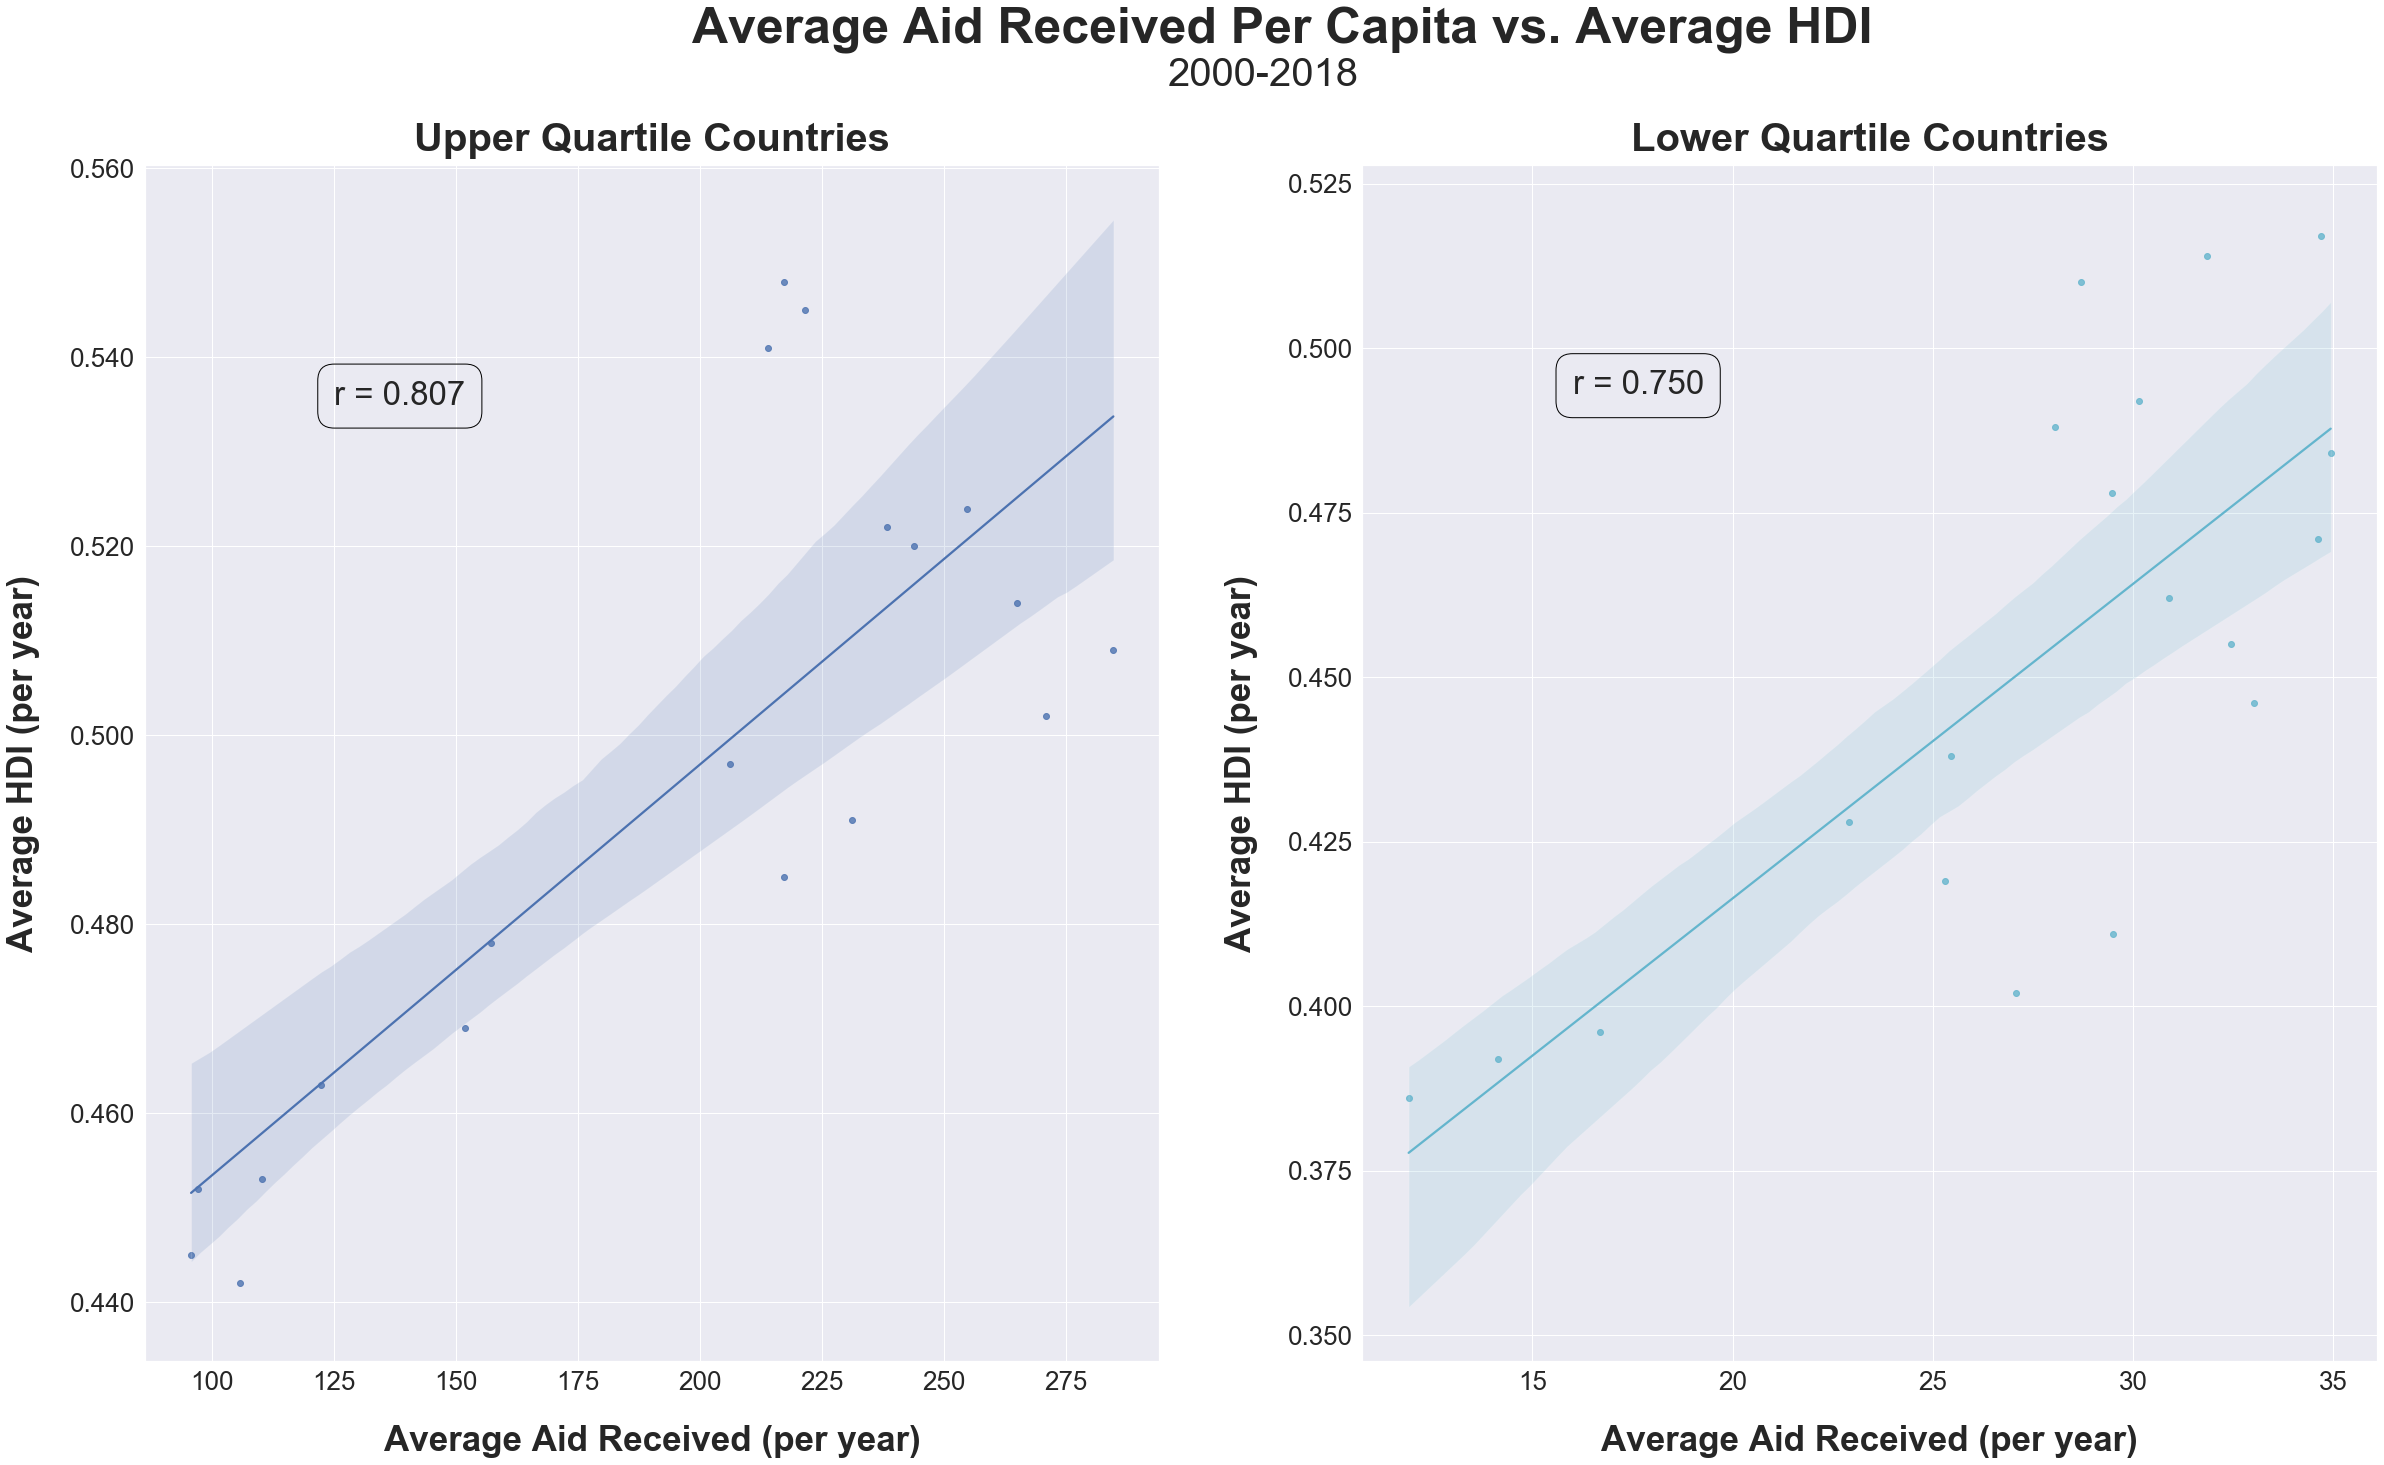

In [771]:
from matplotlib.ticker import FormatStrFormatter

sns.set()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(40,22))
sns.regplot(avg_aid_upper, avg_hdi_upper, ax=ax1, color='b')
sns.regplot(avg_aid_lower, avg_hdi_lower, ax=ax2, color='c')
ax1.tick_params(axis='both', which='both', labelsize=26)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax2.tick_params(axis='both', which='both', labelsize=26)
fig.suptitle('Average Aid Received Per Capita vs. Average HDI', fontsize=50, fontweight='semibold', x=0.52)
plt.figtext(x=0.48, y=0.93, s='2000-2018', fontsize=40)
ax1.text(x=125, y=0.535, s='r = 0.807', fontsize=33, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))
ax2.text(x=16, y=0.493, s='r = 0.750', fontsize=33, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))
ax1.set_title('Upper Quartile Countries', fontsize=40, fontweight='semibold', pad=15)
ax2.set_title('Lower Quartile Countries', fontsize=40, fontweight='semibold', pad=15)
ax1.set_ylabel('Average HDI (per year)', fontsize=35, fontweight='semibold', labelpad=30)
ax2.set_ylabel('Average HDI (per year)', fontsize=35, fontweight='semibold', labelpad=30)
ax1.set_xlabel('Average Aid Received (per year)', fontsize=35, fontweight='semibold', labelpad=30)
ax2.set_xlabel('Average Aid Received (per year)', fontsize=35, fontweight='semibold', labelpad=30);
plt.savefig('Aid Received vs HDI', bbox_inches = "tight", pad_inches=1);

>Here is Aid vs. HDI plotted and saved. Sweet! Onto the next one..

>Next let's take a look at GINI coefficients..

In [774]:
# import csv and clean it down to countries and years we need.
df_gini = pd.read_csv('gini.csv')
df_gini.set_index('country', inplace=True)
df_gini

1800  1801  1802  1803  1804  1805  1806  1807  1808  1809  ...  \
country                                                                  ...   
Afghanistan  30.5  30.5  30.5  30.5  30.5  30.5  30.5  30.5  30.5  30.5  ...   
Albania      38.9  38.9  38.9  38.9  38.9  38.9  38.9  38.9  38.9  38.9  ...   
Algeria      56.2  56.2  56.2  56.2  56.2  56.2  56.2  56.2  56.2  56.2  ...   
Andorra      40.0  40.0  40.0  40.0  40.0  40.0  40.0  40.0  40.0  40.0  ...   
Angola       57.2  57.2  57.2  57.2  57.2  57.2  57.2  57.2  57.2  57.2  ...   
...           ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
Venezuela    62.8  62.8  62.8  62.8  62.8  62.8  62.8  62.8  62.8  62.8  ...   
Vietnam      34.2  34.2  34.2  34.2  34.2  34.2  34.2  34.2  34.2  34.2  ...   
Yemen        50.1  50.1  50.1  50.1  50.1  50.1  50.1  50.1  50.1  50.1  ...   
Zambia       54.5  54.5  54.5  54.5  54.5  54.5  54.5  54.5  54.5  54.5  ...   
Zimbabwe     27.5  27.5  27.5  27.5  27.5  27.5  27.5  27.5  27.5  27.5  ...   

             2031  2032  2033  2034  2035  2036  2037  2038  2039  2040  
country                                                                  
Afghanistan  36.8  36.8  36.8  36.8  36.8  36.8  36.8  36.8  36.8  36.8  
Albania      29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0  29.0  
Algeria      27.6  27.6  27.6  27.6  27.6  27.6  27.6  27.6  27.6  27.6  
Andorra      40.0  40.0  40.0  40.0  40.0  40.0  40.0  40.0  40.0  40.0  
Angola       42.6  42.6  42.6  42.6  42.6  42.6  42.6  42.6  42.6  42.6  
...           ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
Venezuela    46.9  46.9  46.9  46.9  46.9  46.9  46.9  46.9  46.9  46.9  
Vietnam      35.3  35.3  35.3  35.3  35.3  35.3  35.3  35.3  35.3  35.3  
Yemen        36.7  36.7  36.7  36.7  36.7  36.7  36.7  36.7  36.7  36.7  
Zambia       57.1  57.1  57.1  57.1  57.1  57.1  57.1  57.1  57.1  57.1  
Zimbabwe     43.2  43.2  43.2  43.2  43.2  43.2  43.2  43.2  43.2  43.2  

[195 rows x 241 columns]

In [777]:
# gini of upper countries.
df_gini_upper = df_gini.loc[countries_upper, '2000':'2018']
df_gini_upper

2000  2001  2002  2003  2004  2005  2006  2007  2008  \
country                                                                       
Rwanda                 47.2  48.2  49.1  49.9  50.6  51.0  51.0  50.7  50.1   
Haiti                  59.1  58.9  58.5  57.9  57.2  56.4  55.6  54.8  54.0   
Mauritania             39.0  39.3  39.6  39.6  39.3  38.8  37.9  36.9  36.1   
Afghanistan            36.8  36.8  36.8  36.8  36.8  36.8  36.8  36.8  36.8   
Bhutan                 40.9  40.9  40.8  40.5  40.1  39.5  39.0  38.6  38.4   
Liberia                36.5  36.5  36.5  36.5  36.5  36.5  36.4  36.2  35.9   
Djibouti               40.1  40.1  40.3  40.6  41.0  41.5  42.1  42.6  43.1   
Sao Tome and Principe  32.1  32.0  31.9  31.8  31.7  31.5  31.4  31.3  31.1   
Vanuatu                37.6  37.6  37.6  37.6  37.6  37.6  37.6  37.6  37.6   
Solomon Islands        46.1  46.1  46.1  46.1  45.9  45.4  44.7  43.8  42.7   
Kiribati               37.0  37.0  37.0  37.0  37.0  37.0  37.0  37.0  37.0   

                       2009  2010  2011  2012  2013  2014  2015  2016  2017  \
country                                                                       
Rwanda                 49.1  48.2  47.4  46.6  46.0  45.5  45.3  45.1  45.1   
Haiti                  53.3  52.5  51.9  51.4  51.1  50.9  50.9  50.9  50.9   
Mauritania             35.3  34.7  34.2  33.6  33.2  32.9  32.7  32.6  32.6   
Afghanistan            36.8  36.8  36.8  36.8  36.8  36.8  36.8  36.8  36.8   
Bhutan                 38.4  38.5  38.6  38.6  38.5  38.3  38.0  37.8  37.6   
Liberia                35.6  35.1  34.6  34.2  33.8  33.5  33.3  33.2  33.2   
Djibouti               43.6  44.1  44.3  44.4  44.4  44.3  44.1  44.1  44.1   
Sao Tome and Principe  31.0  30.9  30.8  30.8  30.8  30.8  30.8  30.8  30.8   
Vanuatu                37.6  37.6  37.6  37.6  37.6  37.6  37.6  37.6  37.6   
Solomon Islands        41.6  40.4  39.3  38.4  37.7  37.3  37.1  37.1  37.1   
Kiribati               37.0  37.0  37.0  37.0  37.0  37.0  37.0  37.0  37.0   

                       2018  
country                      
Rwanda                 45.1  
Haiti                  50.9  
Mauritania             32.6  
Afghanistan            36.8  
Bhutan                 37.5  
Liberia                33.2  
Djibouti               44.1  
Sao Tome and Principe  30.8  
Vanuatu                37.6  
Solomon Islands        37.1  
Kiribati               37.0

In [778]:
# gini of lower countries.
df_gini_lower = df_gini.loc[countries_lower, '2000':'2018']
df_gini_lower

2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  \
country                                                                        
Bangladesh        33.3  33.3  33.3  33.3  33.2  33.1  33.0  32.8  32.6  32.4   
Myanmar           38.1  38.1  38.1  38.1  38.1  38.1  38.1  38.1  38.1  38.1   
Angola            51.8  51.3  50.6  49.7  48.5  47.3  46.2  45.0  44.1  43.4   
Nepal             39.5  40.6  41.6  42.2  42.2  41.7  40.6  39.1  37.5  36.0   
Madagascar        42.7  43.7  44.3  43.7  42.3  41.4  40.9  40.9  41.4  41.8   
Sudan             35.7  35.7  35.6  35.6  35.6  35.5  35.5  35.5  35.4  35.4   
Ethiopia          32.1  30.7  29.9  29.9  30.0  30.2  30.5  30.9  31.5  32.1   
Togo              45.2  44.7  44.2  43.7  43.2  43.0  43.0  43.2  43.7  44.5   
Guinea            44.2  43.8  43.3  42.7  42.0  41.2  40.2  39.2  38.2  37.1   
Chad              39.7  39.8  39.9  40.1  40.4  40.7  41.1  41.6  42.0  42.4   
Congo, Dem. Rep.  42.2  42.2  42.2  42.2  42.2  42.2  42.2  42.1  42.1  42.1   

                  2010  2011  2012  2013  2014  2015  2016  2017  2018  
country                                                                 
Bangladesh        32.3  32.2  32.2  32.3  32.3  32.3  32.4  32.4  32.4  
Myanmar           38.1  38.1  38.1  38.1  38.1  38.1  38.1  38.1  38.1  
Angola            42.9  42.7  42.6  42.6  42.6  42.6  42.6  42.6  42.6  
Nepal             34.7  33.8  33.2  32.8  32.8  32.8  32.8  32.8  32.8  
Madagascar        42.2  42.4  42.6  42.6  42.7  42.7  42.7  42.7  42.7  
Sudan             35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  
Ethiopia          32.7  33.5  34.5  35.5  36.7  37.7  38.4  38.8  39.1  
Togo              45.0  45.1  45.0  44.5  43.9  43.5  43.2  43.1  43.1  
Guinea            36.0  35.1  34.4  34.0  33.7  33.7  33.7  33.7  33.7  
Chad              42.8  43.1  43.2  43.3  43.3  43.3  43.3  43.3  43.3  
Congo, Dem. Rep.  42.1  42.1  42.1  42.1  42.1  42.1  42.1  42.1  42.1

>Now that we have our dataframes for upper and lower, we can now find the means for each year.

In [783]:
avg_gini_upper = df_gini_upper.mean().round(1)
avg_gini_upper

2000    41.1
2001    41.2
2002    41.3
2003    41.3
2004    41.2
2005    41.1
2006    40.9
2007    40.6
2008    40.3
2009    39.9
2010    39.6
2011    39.3
2012    39.0
2013    38.8
2014    38.6
2015    38.5
2016    38.5
2017    38.4
2018    38.4
dtype: float64

In [784]:
avg_gini_lower = df_gini_lower.mean().round(1)
avg_gini_lower

2000    40.4
2001    40.4
2002    40.3
2003    40.1
2004    39.8
2005    39.5
2006    39.2
2007    38.9
2008    38.8
2009    38.7
2010    38.6
2011    38.5
2012    38.5
2013    38.5
2014    38.5
2015    38.6
2016    38.6
2017    38.6
2018    38.7
dtype: float64

In [782]:
#NOTE: make scatter plot to show corr, and make a bar plot to show the overall change from 2000-2018.

In [787]:
# first let's calculate the corrcoef from each plot, so that we can put it on the plot. 
gini_corr_upper = avg_aid_upper.corr(avg_gini_upper, method='pearson')
gini_corr_lower = avg_aid_lower.corr(avg_gini_lower, method='pearson')
gini_corr_upper, gini_corr_lower

(-0.8073250199881262, -0.8298057981688876)

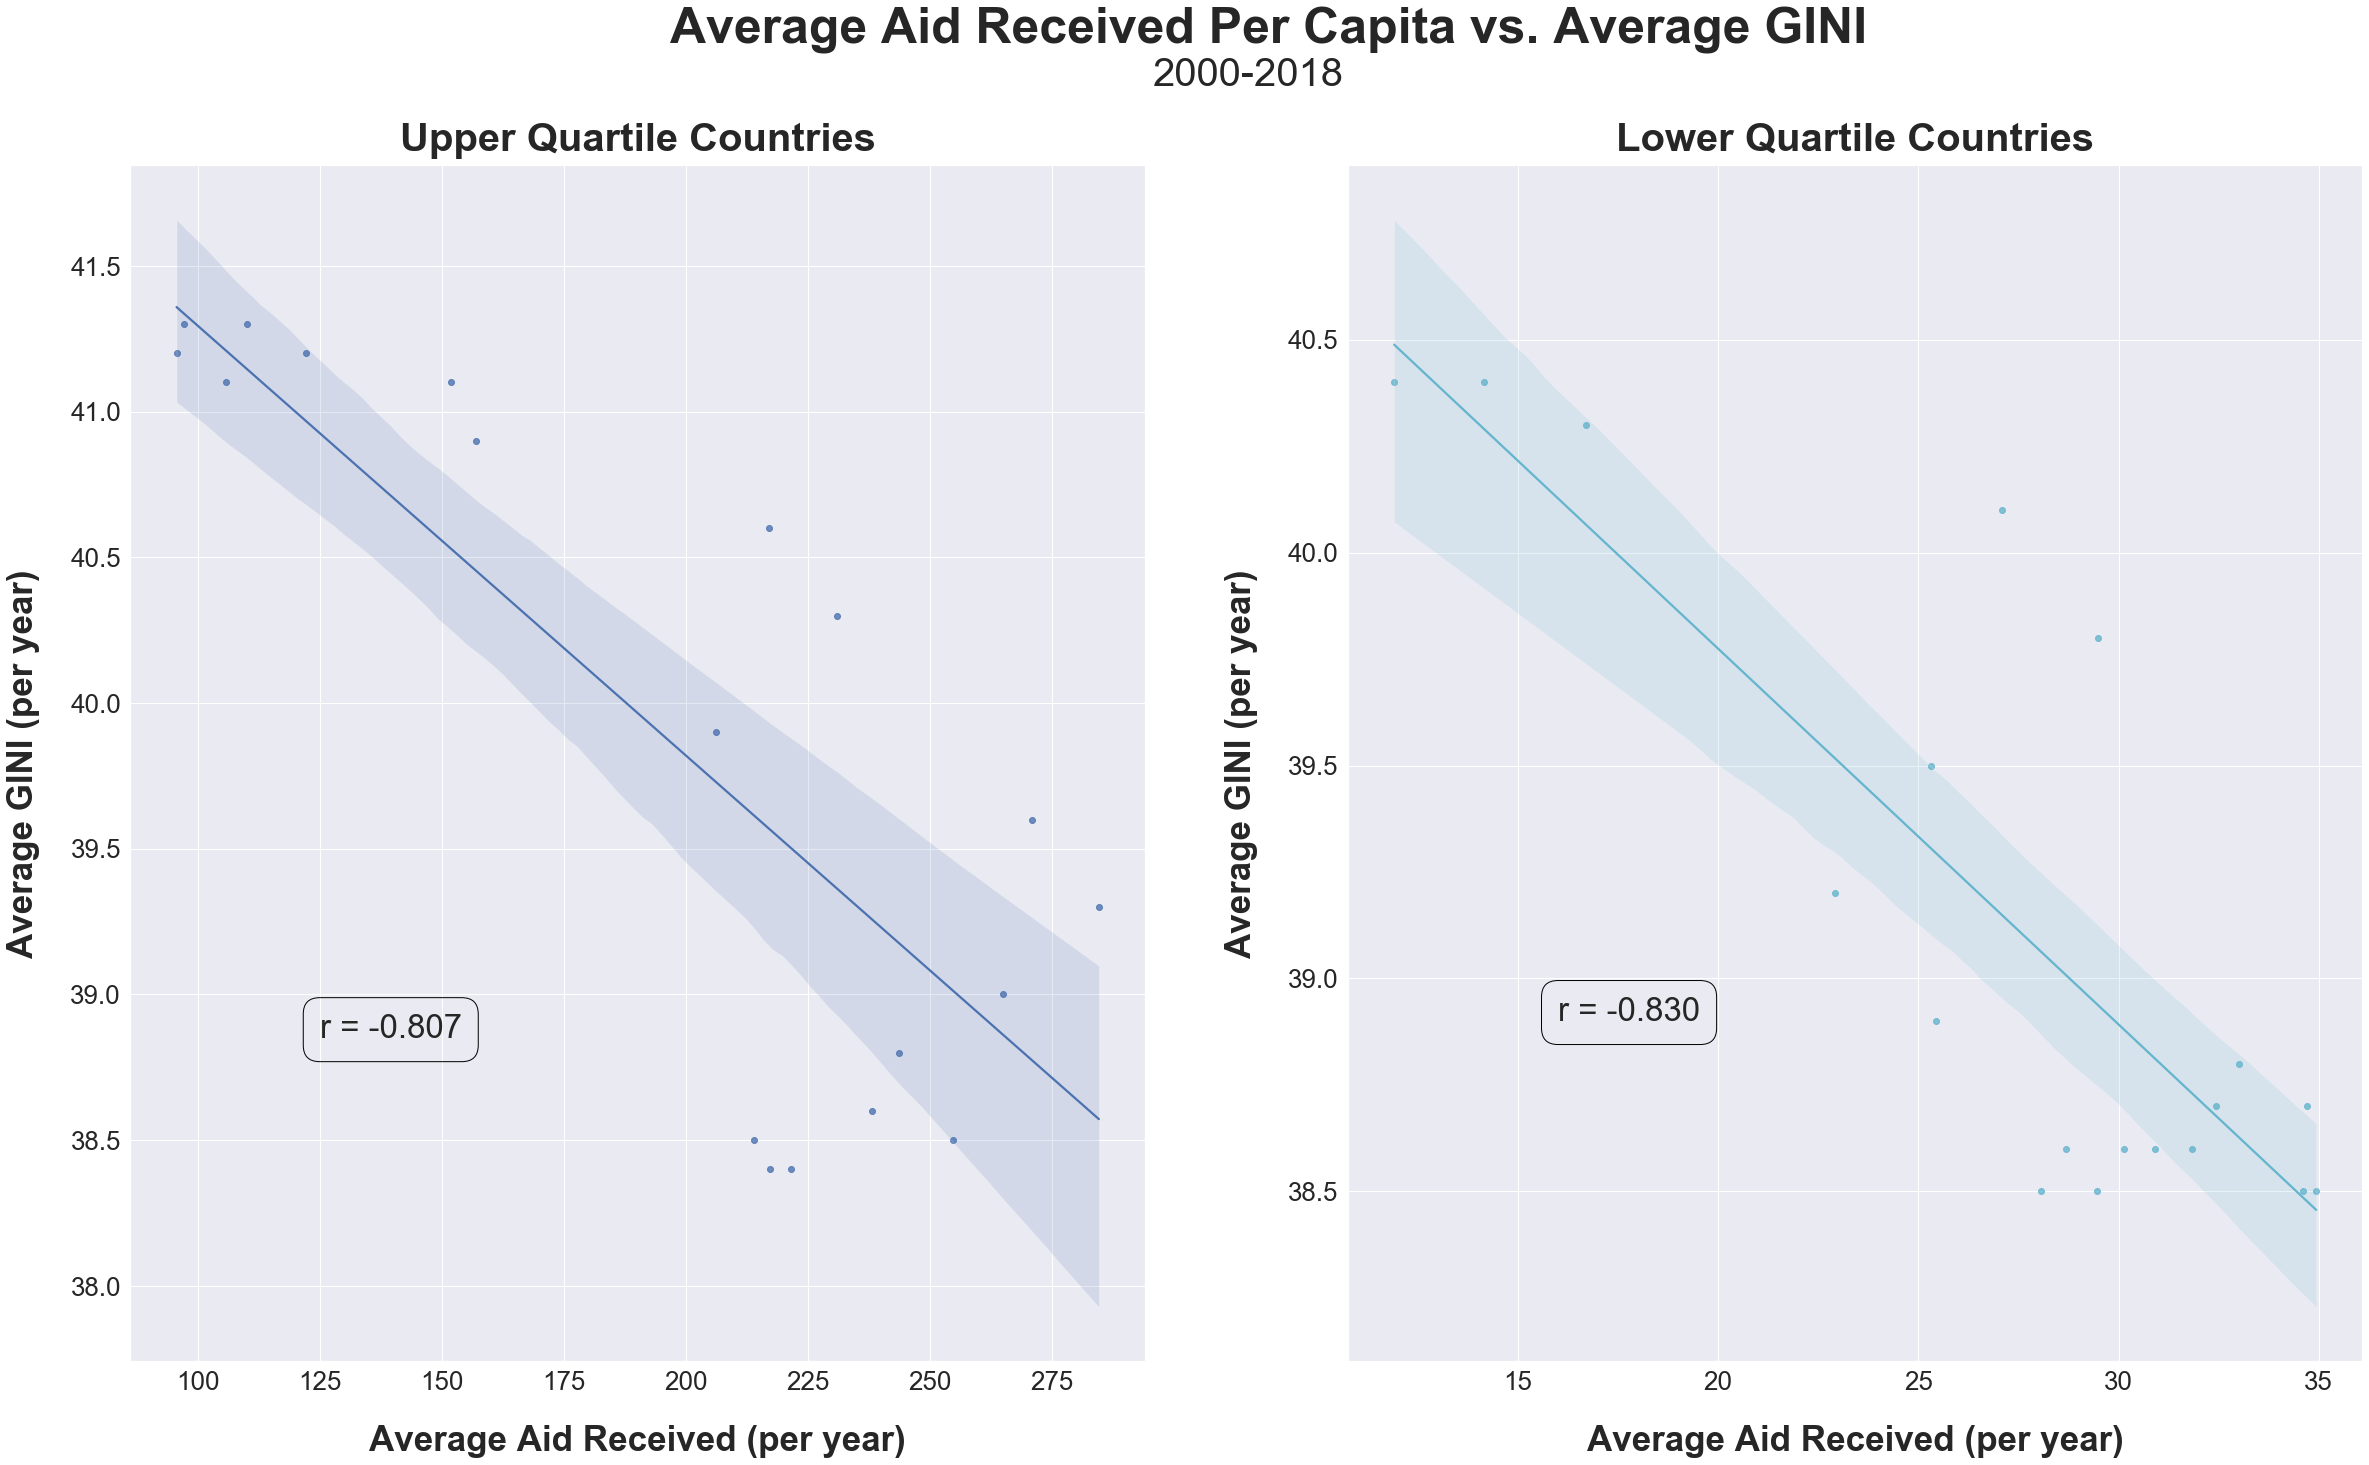

In [792]:
sns.set()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(40,22))
sns.regplot(avg_aid_upper, avg_gini_upper, ax=ax1, color='b')
sns.regplot(avg_aid_lower, avg_gini_lower, ax=ax2, color='c')
ax1.tick_params(axis='both', which='both', labelsize=26)
ax2.tick_params(axis='both', which='both', labelsize=26)
fig.suptitle('Average Aid Received Per Capita vs. Average GINI', fontsize=50, fontweight='semibold', x=0.52)
plt.figtext(x=0.48, y=0.93, s='2000-2018', fontsize=40)
ax1.text(x=125, y=38.85, s='r = -0.807', fontsize=33, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))
ax2.text(x=16, y=38.9, s='r = -0.830', fontsize=33, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))
ax1.set_title('Upper Quartile Countries', fontsize=40, fontweight='semibold', pad=15)
ax2.set_title('Lower Quartile Countries', fontsize=40, fontweight='semibold', pad=15)
ax1.set_ylabel('Average GINI (per year)', fontsize=35, fontweight='semibold', labelpad=30)
ax2.set_ylabel('Average GINI (per year)', fontsize=35, fontweight='semibold', labelpad=30)
ax1.set_xlabel('Average Aid Received (per year)', fontsize=35, fontweight='semibold', labelpad=30)
ax2.set_xlabel('Average Aid Received (per year)', fontsize=35, fontweight='semibold', labelpad=30)
plt.savefig('Aid Received vs GINI', bbox_inches = "tight", pad_inches=1);

>Here is aid vs. gini. We see a negative correlation, which is what we would expect, since gini represents income inequality. The lower gini is, the better. Very similar correlations here. 

> Next let's take a look at fertility rates. 

In [794]:
# Import fertility rates, set index as country.

df_fertility = pd.read_csv('fertility_rates.csv')
df_fertility.set_index('country', inplace=True)
df_fertility

1800  1801  1802  1803  1804  1805  1806  1807  1808  \
country                                                                     
Afghanistan          7.00  7.00  7.00  7.00  7.00  7.00  7.00  7.00  7.00   
Albania              4.60  4.60  4.60  4.60  4.60  4.60  4.60  4.60  4.60   
Algeria              6.99  6.99  6.99  6.99  6.99  6.99  6.99  6.99  6.99   
Angola               6.93  6.93  6.93  6.93  6.93  6.93  6.93  6.94  6.94   
Antigua and Barbuda  5.00  5.00  4.99  4.99  4.99  4.98  4.98  4.97  4.97   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
Venezuela            5.63  5.63  5.64  5.64  5.64  5.65  5.65  5.65  5.66   
Vietnam              4.70  4.70  4.70  4.70  4.70  4.70  4.70  4.70  4.70   
Yemen                6.88  6.88  6.88  6.88  6.88  6.88  6.88  6.88  6.88   
Zambia               6.71  6.71  6.71  6.71  6.71  6.71  6.71  6.71  6.71   
Zimbabwe             6.75  6.75  6.75  6.75  6.75  6.75  6.75  6.75  6.75   

                     1809  ...  2091  2092  2093  2094  2095  2096  2097  \
country                    ...                                             
Afghanistan          7.00  ...  1.74  1.74  1.74  1.74  1.74  1.74  1.74   
Albania              4.60  ...  1.78  1.78  1.78  1.79  1.79  1.79  1.79   
Algeria              6.99  ...  1.86  1.86  1.86  1.86  1.86  1.86  1.86   
Angola               6.94  ...  2.54  2.52  2.50  2.48  2.47  2.45  2.43   
Antigua and Barbuda  4.97  ...  1.81  1.81  1.81  1.81  1.81  1.81  1.81   
...                   ...  ...   ...   ...   ...   ...   ...   ...   ...   
Venezuela            5.66  ...  1.78  1.78  1.78  1.79  1.79  1.79  1.79   
Vietnam              4.70  ...  1.89  1.89  1.89  1.89  1.89  1.89  1.89   
Yemen                6.88  ...  1.68  1.68  1.69  1.69  1.69  1.69  1.70   
Zambia               6.71  ...  2.59  2.57  2.56  2.54  2.53  2.51  2.50   
Zimbabwe             6.75  ...  1.85  1.85  1.85  1.84  1.84  1.84  1.83   

                     2098  2099  2100  
country                                
Afghanistan          1.74  1.74  1.74  
Albania              1.79  1.79  1.79  
Algeria              1.86  1.86  1.86  
Angola               2.42  2.40  2.40  
Antigua and Barbuda  1.82  1.82  1.82  
...                   ...   ...   ...  
Venezuela            1.79  1.79  1.79  
Vietnam              1.89  1.89  1.89  
Yemen                1.70  1.70  1.70  
Zambia               2.48  2.46  2.46  
Zimbabwe             1.83  1.83  1.83  

[184 rows x 301 columns]

In [797]:
# fertility rates of upper quartile countries.

df_fertility_upper = df_fertility.loc[countries_upper, '2000':'2018']
df_fertility_upper

2000  2001  2002  2003  2004  2005  2006  2007  2008  \
country                                                                       
Rwanda                 5.64  5.54  5.45  5.35  5.24  5.14  5.02  4.90  4.77   
Haiti                  4.30  4.18  4.07  3.96  3.85  3.76  3.67  3.58  3.49   
Mauritania             5.45  5.39  5.34  5.28  5.23  5.18  5.14  5.10  5.06   
Afghanistan            7.49  7.39  7.27  7.14  6.99  6.83  6.65  6.46  6.25   
Bhutan                 3.60  3.42  3.24  3.09  2.95  2.84  2.73  2.64  2.55   
Liberia                5.88  5.80  5.72  5.64  5.55  5.46  5.37  5.28  5.19   
Djibouti               4.48  4.36  4.24  4.12  3.99  3.87  3.74  3.62  3.50   
Sao Tome and Principe  5.28  5.23  5.17  5.12  5.07  5.02  4.97  4.93  4.88   
Vanuatu                4.37  4.27  4.16  4.06  3.95  3.85  3.76  3.68  3.61   
Solomon Islands        4.72  4.67  4.62  4.58  4.54  4.50  4.46  4.41  4.36   
Kiribati               4.06  4.02  3.98  3.95  3.93  3.91  3.90  3.88  3.87   

                       2009  2010  2011  2012  2013  2014  2015  2016  2017  \
country                                                                       
Rwanda                 4.64  4.52  4.39  4.27  4.16  4.06  3.97  3.89  3.81   
Haiti                  3.41  3.33  3.25  3.17  3.10  3.03  2.97  2.92  2.87   
Mauritania             5.02  4.98  4.94  4.90  4.85  4.79  4.74  4.67  4.61   
Afghanistan            6.04  5.82  5.60  5.38  5.17  4.98  4.80  4.64  4.48   
Bhutan                 2.46  2.38  2.31  2.24  2.18  2.13  2.09  2.05  2.02   
Liberia                5.11  5.02  4.94  4.87  4.79  4.72  4.65  4.58  4.51   
Djibouti               3.40  3.30  3.21  3.13  3.06  2.98  2.91  2.85  2.79   
Sao Tome and Principe  4.84  4.79  4.74  4.69  4.64  4.58  4.52  4.46  4.39   
Vanuatu                3.55  3.50  3.46  3.42  3.38  3.35  3.31  3.28  3.24   
Solomon Islands        4.30  4.24  4.17  4.10  4.03  3.97  3.91  3.85  3.80   
Kiribati               3.86  3.84  3.82  3.80  3.77  3.73  3.69  3.65  3.61   

                       2018  
country                      
Rwanda                 3.74  
Haiti                  2.82  
Mauritania             4.55  
Afghanistan            4.33  
Bhutan                 1.99  
Liberia                4.45  
Djibouti               2.73  
Sao Tome and Principe  4.33  
Vanuatu                3.20  
Solomon Islands        3.74  
Kiribati               3.57

In [798]:
# fertility rates lower quartile. 

df_fertility_lower = df_fertility.loc[countries_lower, '2000':'2018']
df_fertility_lower

2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  \
country                                                                        
Bangladesh        3.12  3.01  2.91  2.80  2.70  2.61  2.52  2.44  2.38  2.32   
Myanmar           2.91  2.89  2.87  2.83  2.78  2.72  2.66  2.59  2.53  2.47   
Angola            6.64  6.60  6.57  6.54  6.50  6.47  6.42  6.37  6.31  6.24   
Nepal             4.03  3.88  3.72  3.58  3.43  3.29  3.15  3.01  2.87  2.74   
Madagascar        5.55  5.45  5.34  5.24  5.14  5.05  4.96  4.87  4.78  4.69   
Sudan             5.47  5.40  5.33  5.27  5.20  5.14  5.09  5.03  4.98  4.93   
Ethiopia          6.53  6.38  6.22  6.04  5.87  5.69  5.52  5.36  5.20  5.06   
Togo              5.41  5.36  5.32  5.28  5.23  5.18  5.12  5.06  5.00  4.94   
Guinea            6.08  6.02  5.95  5.88  5.80  5.73  5.65  5.58  5.50  5.42   
Chad              7.35  7.32  7.27  7.21  7.15  7.07  6.99  6.90  6.80  6.70   
Congo, Dem. Rep.  6.96  6.91  6.86  6.81  6.76  6.71  6.66  6.61  6.57  6.52   

                  2010  2011  2012  2013  2014  2015  2016  2017  2018  
country                                                                 
Bangladesh        2.28  2.24  2.21  2.18  2.16  2.13  2.10  2.08  2.05  
Myanmar           2.41  2.36  2.32  2.29  2.26  2.23  2.21  2.19  2.17  
Angola            6.16  6.08  6.00  5.92  5.84  5.77  5.69  5.62  5.55  
Nepal             2.61  2.49  2.38  2.29  2.22  2.16  2.12  2.08  2.05  
Madagascar        4.60  4.52  4.44  4.37  4.30  4.24  4.18  4.13  4.08  
Sudan             4.88  4.83  4.77  4.72  4.66  4.60  4.53  4.47  4.41  
Ethiopia          4.92  4.80  4.68  4.56  4.44  4.32  4.20  4.08  3.97  
Togo              4.87  4.80  4.73  4.66  4.59  4.52  4.45  4.38  4.32  
Guinea            5.34  5.26  5.18  5.09  5.01  4.93  4.86  4.78  4.70  
Chad              6.59  6.48  6.37  6.26  6.16  6.05  5.95  5.85  5.75  
Congo, Dem. Rep.  6.47  6.42  6.36  6.30  6.24  6.17  6.09  6.02  5.92

In [803]:
# find means for upper.
avg_fertility_upper = df_fertility_upper.mean().round(2)
avg_fertility_upper

2000    5.02
2001    4.93
2002    4.84
2003    4.75
2004    4.66
2005    4.58
2006    4.49
2007    4.41
2008    4.32
2009    4.24
2010    4.16
2011    4.08
2012    4.00
2013    3.92
2014    3.85
2015    3.78
2016    3.71
2017    3.65
2018    3.59
dtype: float64

In [805]:
# means for lower. 
avg_fertility_lower = df_fertility_lower.mean().round(2)
avg_fertility_lower

2000    5.46
2001    5.38
2002    5.31
2003    5.23
2004    5.14
2005    5.06
2006    4.98
2007    4.89
2008    4.81
2009    4.73
2010    4.65
2011    4.57
2012    4.49
2013    4.42
2014    4.35
2015    4.28
2016    4.22
2017    4.15
2018    4.09
dtype: float64

In [806]:
# now let's calculate the corrcoef for each plot. 
fertility_corr_upper = avg_aid_upper.corr(avg_fertility_upper, method='pearson')
fertility_corr_lower = avg_aid_lower.corr(avg_fertility_lower, method='pearson')
fertility_corr_upper, fertility_corr_lower

(-0.8184821221584632, -0.763535486721926)

>Now let's plot..

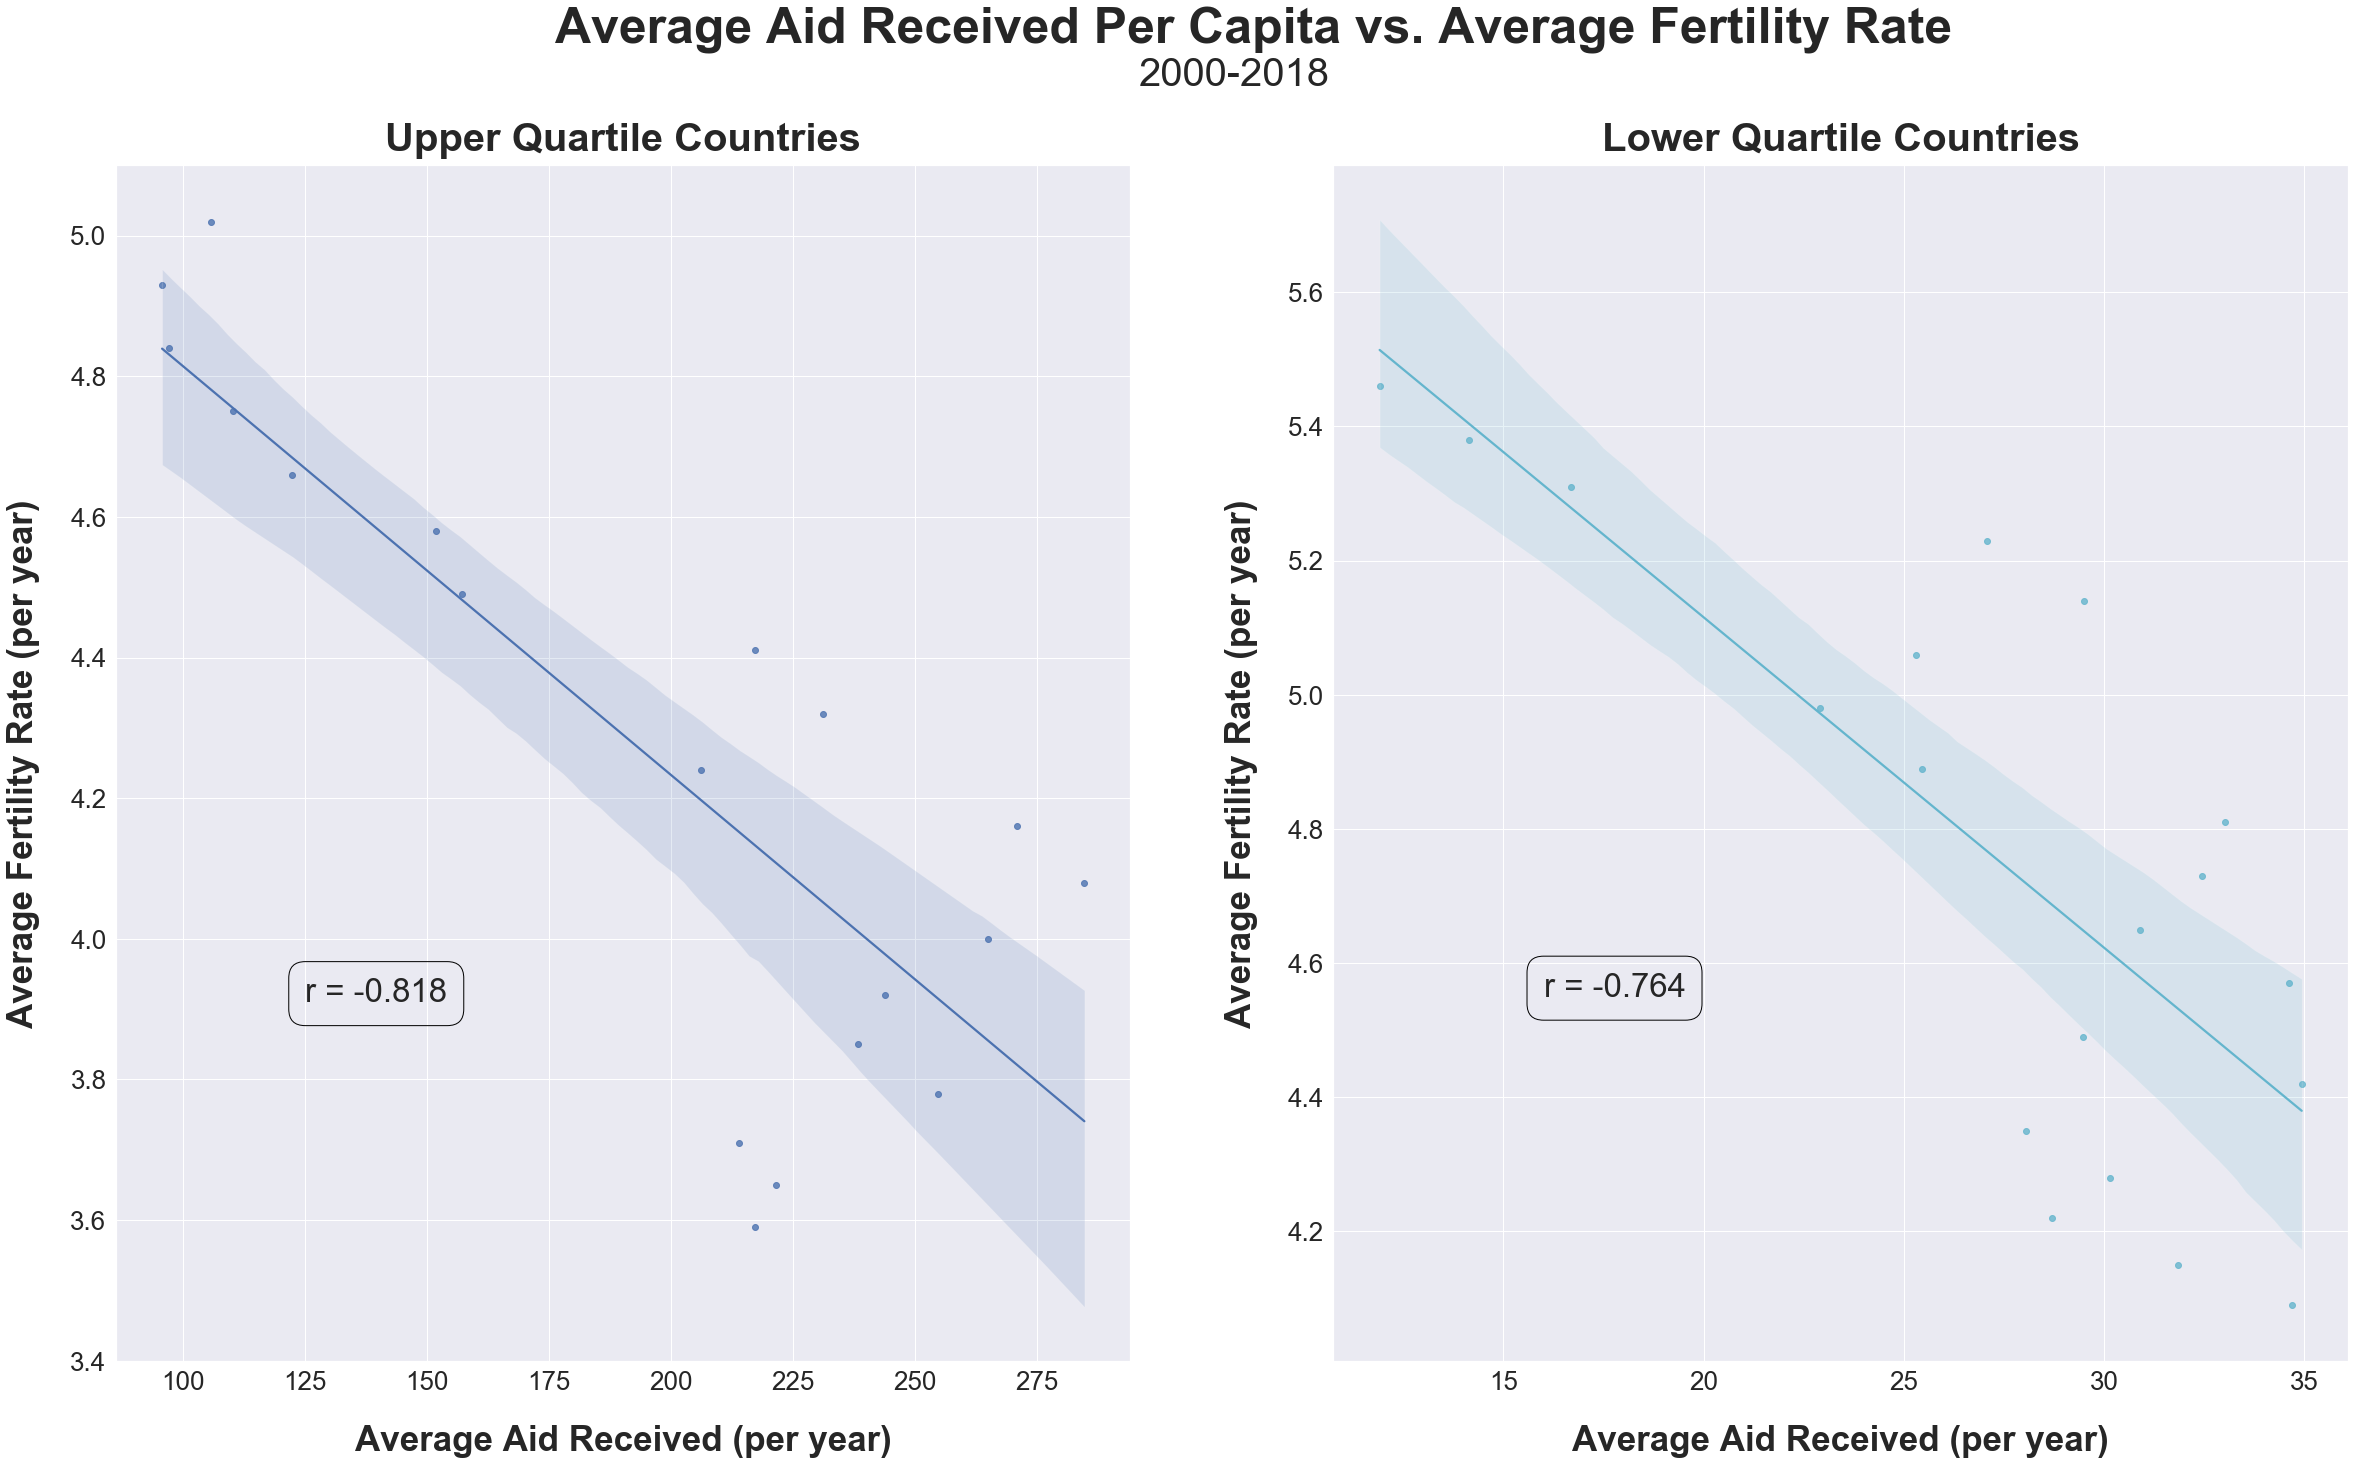

In [812]:
sns.set()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(40,22))
sns.regplot(avg_aid_upper, avg_fertility_upper, ax=ax1, color='b')
sns.regplot(avg_aid_lower, avg_fertility_lower, ax=ax2, color='c')
ax1.tick_params(axis='both', which='both', labelsize=26)
# ax1.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
# ax2.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax2.tick_params(axis='both', which='both', labelsize=26)
fig.suptitle('Average Aid Received Per Capita vs. Average Fertility Rate', fontsize=50, fontweight='semibold', x=0.52)
plt.figtext(x=0.48, y=0.93, s='2000-2018', fontsize=40)
ax1.text(x=125, y=3.91, s='r = -0.818', fontsize=33, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))
ax2.text(x=16, y=4.55, s='r = -0.764', fontsize=33, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))
ax1.set_title('Upper Quartile Countries', fontsize=40, fontweight='semibold', pad=15)
ax2.set_title('Lower Quartile Countries', fontsize=40, fontweight='semibold', pad=15)
ax1.set_ylabel('Average Fertility Rate (per year)', fontsize=35, fontweight='semibold', labelpad=30)
ax2.set_ylabel('Average Fertility Rate (per year)', fontsize=35, fontweight='semibold', labelpad=30)
ax1.set_xlabel('Average Aid Received (per year)', fontsize=35, fontweight='semibold', labelpad=30)
ax2.set_xlabel('Average Aid Received (per year)', fontsize=35, fontweight='semibold', labelpad=30);
# plt.savefig('Aid Received vs GINI', bbox_inches = "tight", pad_inches=1);

> Here is aid vs fertiity rates. We see a stronger correlation with upper quartile countries, although not much higher. 